In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## 1. Exploratory Data Analysis

In [3]:
# Checking the shape of the DataFrame
df.shape

(284807, 31)

* **Number of colums:** 31
* **Number of rows:** 284,807  

In [4]:
# Generating descriptive statistics
df.describe(include = 'all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.369007e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.500885e-15,-5.620335e-16,1.149614e-16,-2.426963e-15,...,1.596686e-16,-3.576577e-16,2.650499e-16,4.472317e-15,5.109395e-16,1.686100e-15,-3.662399e-16,-1.225457e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Descriptive Statistics Interpretation (Credit Card Fraud Detection - mlg-ulb)

**General Observations:**

* **Highly Imbalanced Dataset:** The "Class" column has a mean of 0.001727, indicating a very low proportion of fraudulent transactions.
* **Time Feature:** The "Time" column represents elapsed time, suggesting temporal patterns.
* **PCA-Transformed V Features:** "V1" to "V28" are scaled and centered PCA components.
* **Amount Column with Outliers:** Wide range of transaction amounts with potential outliers.

**Detailed Interpretation:**

* **Time:** Represents elapsed time since the first transaction.
* **V1-V28:** PCA components; focus on statistical properties.
* **Amount:** Highly variable with potential outliers.
* **Class:** Extremely imbalanced; requires specialized handling.

**Key Takeaways:**

* **Address Class Imbalance:** Use oversampling, undersampling, or SMOTE.
* **Consider Time Series:** Explore temporal patterns.
* **Handle Outliers:** Address outliers in "Amount."
* **Scale Amount:** Scale the "Amount" column.
* **Use Appropriate Metrics:** Precision, recall, F1-score, AUC-ROC.
* **Further EDA:** Explore feature relationships.

In [5]:
# Examining the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Looking for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

* **No Missing Values are present in the dataset** 

## 2. Further EDA (Visualizations)

### Amount

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


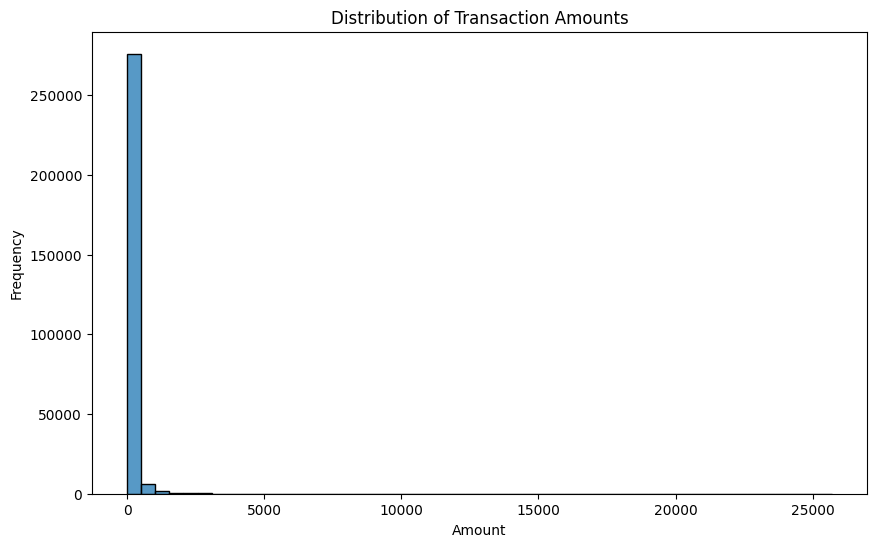

In [7]:
# Histogram of Distribution of Transaction Amounts
plt.figure(figsize = (10, 6))
sns.histplot(df['Amount'], bins = 50)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

## Analysis of Transaction Amount Distribution

### Histogram: Distribution of Transaction Amounts

**Observations:**

* **Extreme Skewness:** The histogram shows a highly skewed distribution with the majority of transactions concentrated at the lower end of the "Amount" range.
* **Long Tail:** The distribution exhibits a long tail towards higher "Amount" values, indicating the presence of a few very large transactions.
* **Concentration at Low Values:** There's a high frequency of transactions with amounts close to zero.

**Interpretation:**

* **Real-World Relevance:** This distribution is typical of real-world credit card transaction amounts.
* **Outlier Confirmation:** The long tail confirms the presence of outliers.
* **Need for Transformation:** The high skewness suggests that the "Amount" feature might benefit from a transformation (e.g., logarithmic).
* **Impact on Modeling:** The skewed distribution and outliers can negatively impact model performance.

**Actions:**

* Implement outlier handling strategies.
* Consider data transformation to reduce skewness.
* Use robust scaling techniques.
* Investigate the nature of high-value transactions.


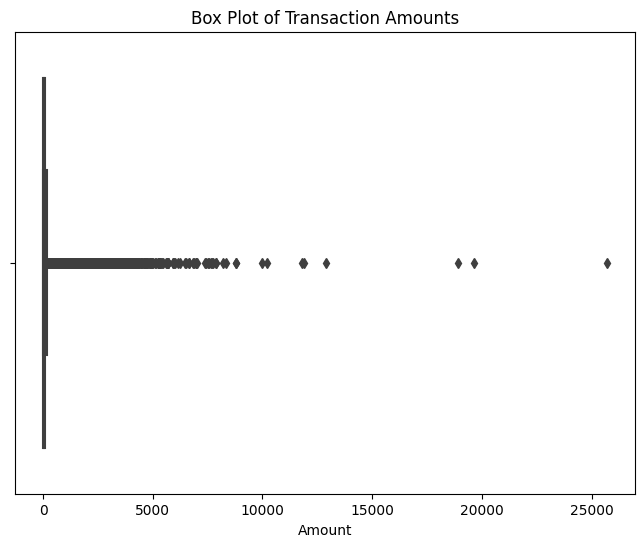

In [8]:
# Box Plot of Transaction Amounts
plt.figure(figsize = (8, 6))
sns.boxplot(x = df['Amount'])
plt.title('Box Plot of Transaction Amounts')
plt.xlabel('Amount')
plt.show()

### Box Plot: Transaction Amounts

**Observations:**

* **Outliers Present:** The box plot clearly shows numerous outliers on the higher end of the "Amount" distribution.
* **Skewness:** The box plot indirectly shows the right-skewed nature of the data.
* **Range of Typical Values:** The box and whiskers show the range of typical transaction amounts.

**Interpretation:**

* **Confirmation of Outliers:** Confirms the presence of outliers.
* **Skewness Indication:** Reinforces the skewed distribution.
* **Impact on Analysis:** Outliers can affect mean, standard deviation, and model performance.

**Actions:**

* Decide on outlier treatment (removal, capping, transformation, robust scaling).
* Investigate the nature of outliers.
* Document the outlier handling strategy.

### Correlation Matrix

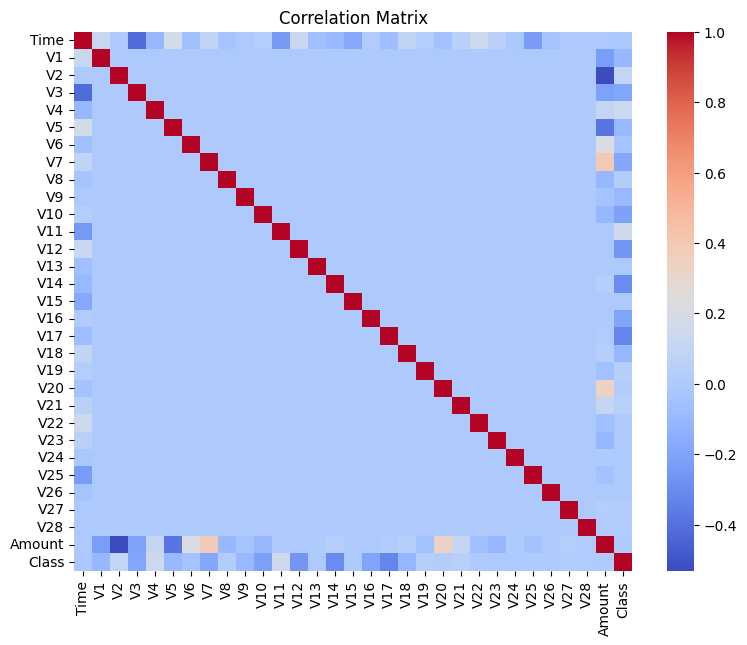

In [9]:
# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize = (9, 7))
sns.heatmap(correlation_matrix, annot = False, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Correlation Matrix Analysis

**General Observations:**

* **Diagonal Dominance:** Perfect positive correlation along the diagonal.
* **V-Variables:** Low correlations between "V1" to "V28" due to PCA transformation.
* **Time:** Weak correlations with other variables.
* **Amount:** Mild correlations with some "V" variables.
* **Class:** Weak correlations with some "V" variables.

**Detailed Interpretation:**

* **V-Variables:** Independent features due to PCA.
* **Time:** Time itself may not be a strong predictor; consider time-based feature engineering.
* **Amount:** Related to some underlying patterns, but not highly predictive.
* **Class:** "V" variables contain some predictive information, but relationships are weak.

**Key Takeaways:**

* PCA successful in creating uncorrelated features.
* "V" variables can be treated as independent.
* Consider time-based features.
* Further analysis of "Amount" and "Class" relationships.
* Non-linear models will be needed.

### Scatter Plots to Explore Relationships between "Amount" and Other Features:

#### V7

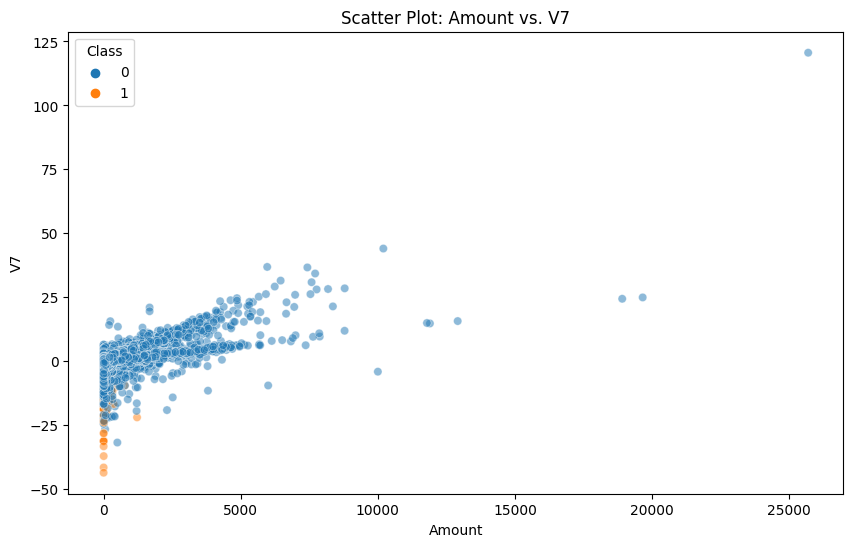

In [10]:
# Scatter Plots to Explore Relationships between "Amount" and Other Features:

# Scatter plot with Class (if possible)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Amount', y='V7', hue='Class', data=df, alpha=0.5) 
plt.title('Scatter Plot: Amount vs. V7')
plt.xlabel('Amount')
plt.ylabel('V7')
plt.show()

## Scatter Plot: Amount vs. V7

**Observations:**

* **Clustering at Low Amounts:** Most transactions have low "Amount" values.
* **Separation of Classes:** Some separation between fraudulent (Class 1) and non-fraudulent (Class 0) transactions.
* **Outliers:** Presence of outliers with high "Amount" values.
* **Relationship:** "V7" tends to increase with "Amount" for non-fraudulent transactions, but not strongly.
* **Fraudulent transactions at low values:** Most fraudulent transactions are at low amount values, and low V7 values.

**Interpretation:**

* **Potential Predictive Power of V7:** "V7" might be useful for fraud detection.
* **Low Amount Fraud:** Fraud can occur in small transactions.
* **Outlier Impact:** Outliers could skew the relationship.
* **Non-Linear Relationship:** Relationship is not strictly linear.

**Actions:**

* Feature engineering to combine "Amount" and "V7."
* Outlier handling.
* Explore non-linear models.
* Create scatter plots with other "V" variables.
* Document observations and implications.


**Note:**
* Initially, 'V7' was selected for the scatter plot against 'Amount' due to a slightly higher observed correlation with the 'Class' variable in the correlation matrix. However, future analysis will involve a more systematic exploration of all 'V' features and their relationships with 'Amount' and 'Class.

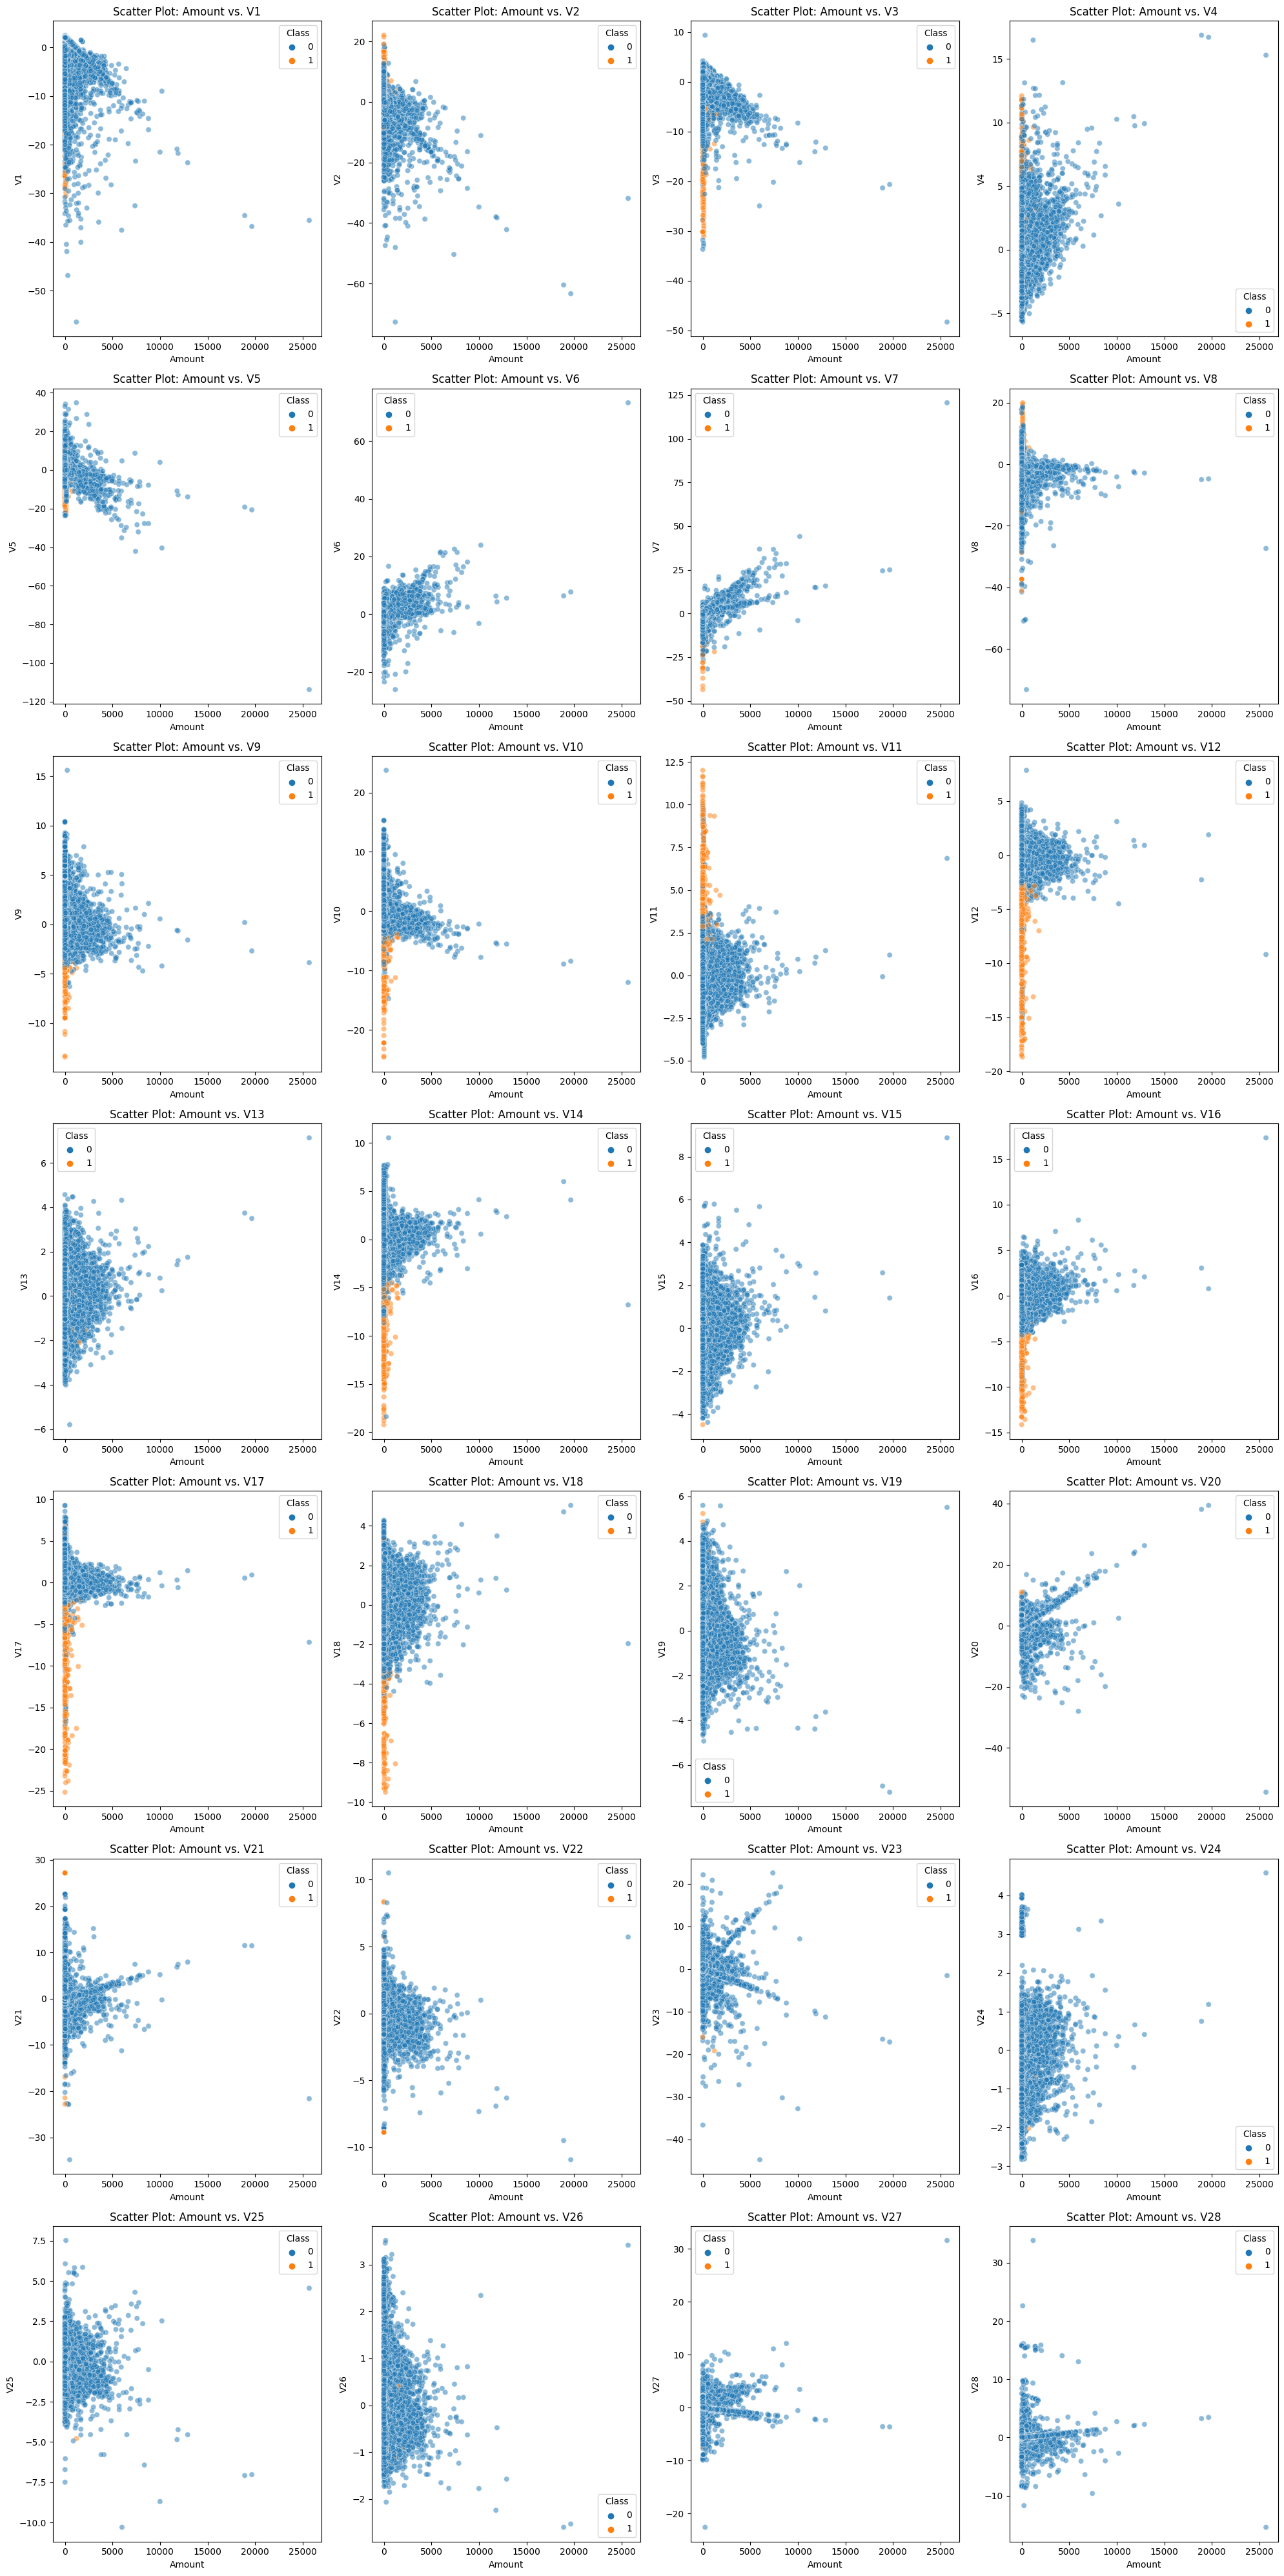

In [11]:
# Create scatter plots for Amount vs. V1 to V28
plt.figure(figsize=(20, 40))  # Adjust the figure size as needed

for i in range(1, 29):
    plt.subplot(7, 4, i)  # Create subplots in a 7x4 grid
    v_feature = f'V{i}'
    sns.scatterplot(x='Amount', y=v_feature, hue='Class', data=df, alpha=0.5)
    plt.title(f'Scatter Plot: Amount vs. {v_feature}')
    plt.xlabel('Amount')
    plt.ylabel(v_feature)

plt.tight_layout()  # Adjust subplot parameters to give specified padding.
plt.show()

## Scatter Plot Analysis: Amount vs. V1-V28

**General Observations:**

* **Clustering at Low Amounts:** Consistent across all plots.
* **Varying Predictive Power:** V9, V10, V11, V12, V17, V18, and V26 show the strongest separation.
* **Non-Linear Relationships:** Relationships are generally non-linear.
* **Outliers:** "Amount" feature shows consistent outliers.
* **Fraud at Low Amounts:** Many fraudulent transactions at low amount values.

**Detailed Observations:**

* **Strong Predictors:** V9, V10, V11, V12, V17, V18, V26.
* **Moderate Predictors:** V19, V20, V21, V23.
* **Weak Predictors:** V13, V14, V15, V16, V22, V24, V25, V27, V28.
* **V1-V8:** Contain useful information, but less strongly seperated.

**Interpretation:**

* **Feature Importance:** Prioritize strong predictors.
* **Model Selection:** Use non-linear models.
* **Outlier Handling:** Address "Amount" outliers.
* **Feature Engineering:** Create interaction/polynomial features.

**Actions:**

* Prioritize strong predictors.
* Feature engineering.
* Use non-linear models.
* Handle outliers.
* Document findings.

### Visualization of the Class Variable:

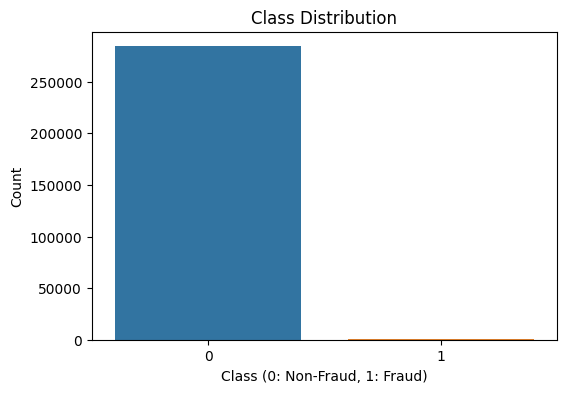

In [12]:
# Visualization of the Class Variable:

# Count plot of Class
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

## Class Distribution Analysis

**Observations:**

* **Extreme Imbalance:** Massive disparity between non-fraudulent (Class 0) and fraudulent (Class 1) transactions.
* **Dominance of Non-Fraudulent:** Non-fraudulent transactions heavily dominate.
* **Rarity of Fraudulent:** Fraudulent transactions are very rare.

**Interpretation:**

* **Highly Imbalanced Dataset:** Confirms the dataset is highly imbalanced.
* **Need for Specialized Techniques:** Requires techniques like oversampling, undersampling, or SMOTE.
* **Evaluation Metrics:** Accuracy is not reliable; use precision, recall, F1-score, AUC-ROC.
* **Real-World Relevance:** Reflects the reality of fraud detection.

**Actions:**

* Address class imbalance using appropriate techniques.
* Use suitable evaluation metrics.
* Document the imbalance and handling techniques.

## 3. Even More EDA

In [13]:
df['Time'].dtype

dtype('float64')

### Time Series Analysis

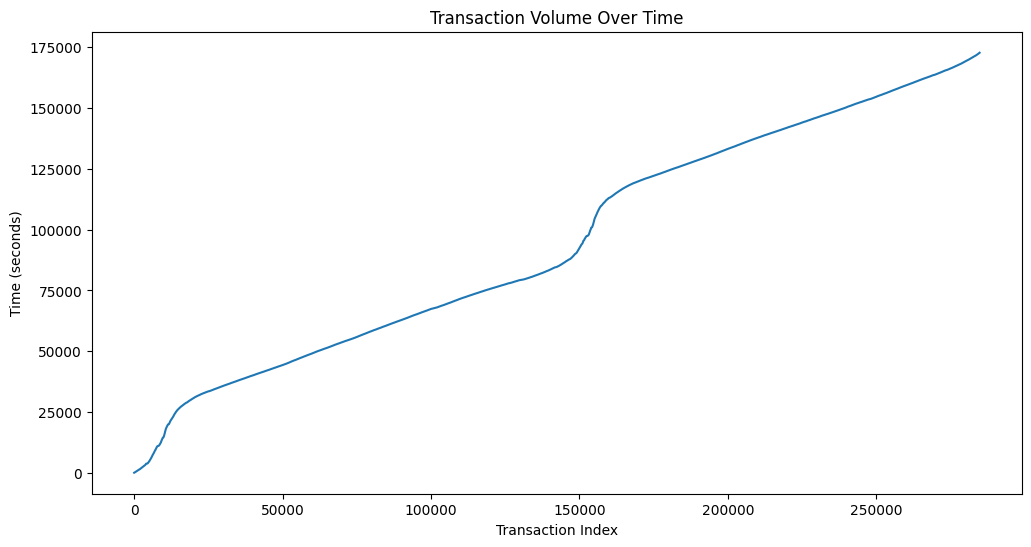

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


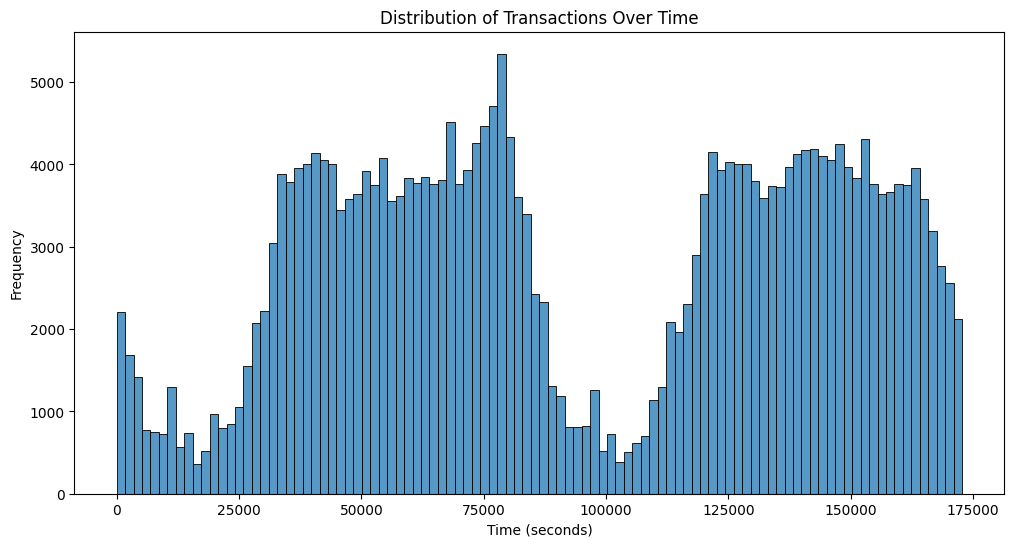

In [14]:
# 1. Line Plot of Transaction Volume Over Time
plt.figure(figsize=(12, 6))
df['Time'].plot()
plt.title('Transaction Volume Over Time')
plt.xlabel('Transaction Index')
plt.ylabel('Time (seconds)')
plt.show()

# 2. Histogram of the Time Column
plt.figure(figsize=(12, 6))
sns.histplot(df['Time'], bins=100)  # You can adjust the number of bins
plt.title('Distribution of Transactions Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()

## Time Series Analysis: Transaction Volume

### Line Plot: Transaction Volume Over Time

**Observations:**

* **Overall Upward Trend:** The plot shows a clear upward trend, indicating that "Time" increases as the transaction index increases.
* **Non-Linear Increase:** The increase is not perfectly linear, suggesting fluctuations in transaction frequency.
* **Sudden Increase:** A noticeable sudden increase in "Time" around transaction index 150000 indicates a period of lower transaction activity.
* **Periods of Steeper Slope:** Indicate periods of lower transaction volume.
* **Periods of Shallower Slope:** Indicate periods of higher transaction volume.

**Interpretation:**

* **Transaction Frequency:** Variations in slope reflect changes in transaction frequency.
* **Potential Anomalies:** The sudden increase around 150000 might be an anomaly.
* **Time-Based Patterns:** Suggests time-based patterns relevant for fraud detection.
* **Data Collection Period:** Provides an overview of the data collection period.

---

### Histogram: Distribution of Transactions Over Time

**Observations:**

* **Bimodal Distribution:** Two distinct peaks indicate two periods of high transaction activity.
* **Peak 1 (Around 75,000 Seconds):** Represents a period of high transaction volume.
* **Peak 2 (Around 150,000 Seconds):** Represents another period of high transaction volume.
* **Low Activity Period (Around 100,000 Seconds):** Significant drop in transaction frequency.
* **Variability Within Peaks:** Fluctuations in transaction frequency within peaks.
* **Low Activity at Start and End:** Relatively low transaction frequency at the beginning and end.

**Interpretation:**

* **Transaction Patterns:** Bimodal distribution reveals two distinct periods of high activity.
* **Low Activity Period:** Could represent system maintenance, low user activity, or an anomaly.
* **Potential for Time-Based Features:** Time-based features could be valuable for fraud detection.

**Next Steps:**

* Analyze fraudulent transactions over time.
* Investigate anomalies, especially the low activity period around 100,000 seconds.
* Consider time-based features for modeling.

In [15]:
# Creating fraud subset (only containing fraudulent data)

fraud_df = df[df['Class'] == 1]

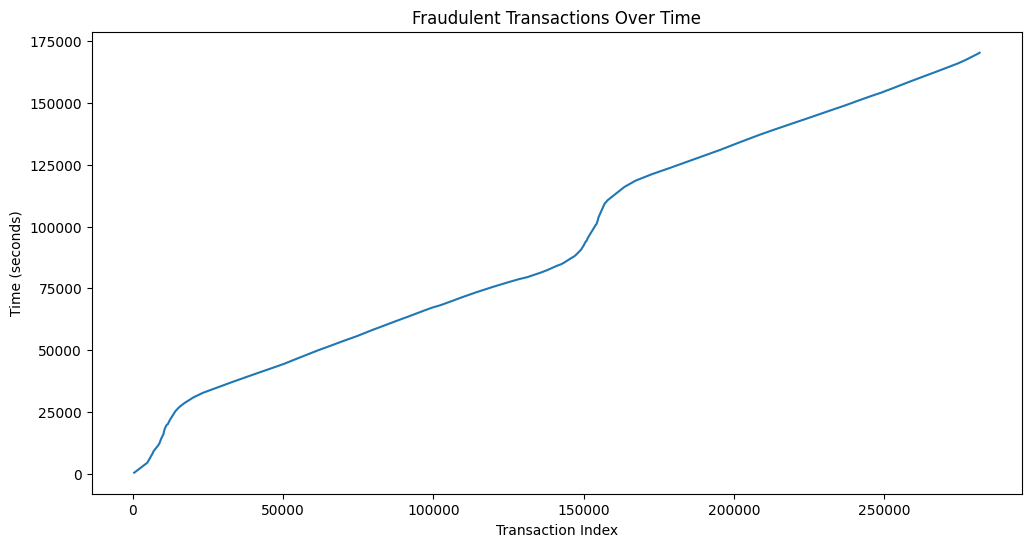

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


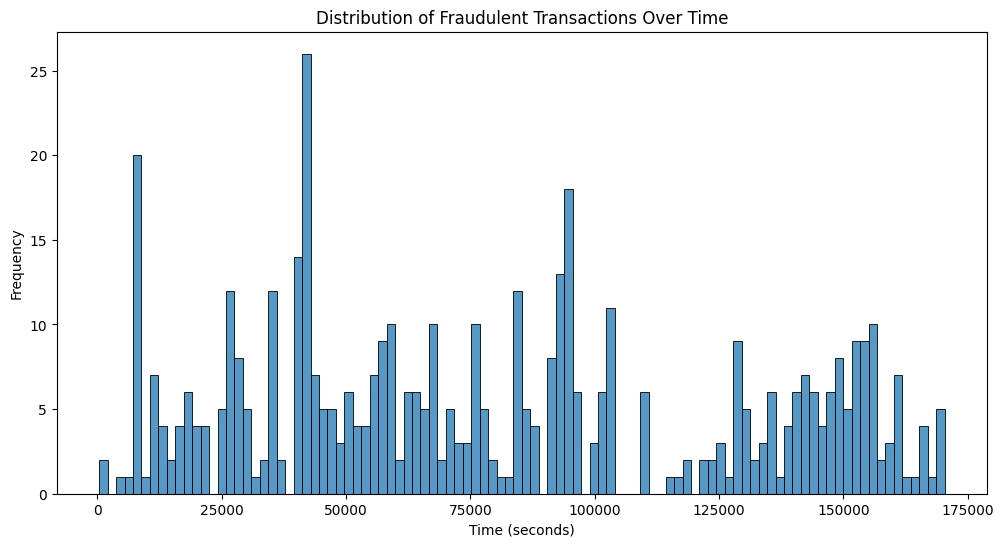

In [16]:
# Line Plot
plt.figure(figsize=(12, 6))
fraud_df['Time'].plot()
plt.title('Fraudulent Transactions Over Time')
plt.xlabel('Transaction Index')
plt.ylabel('Time (seconds)')
plt.show()

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(fraud_df['Time'], bins=100)
plt.title('Distribution of Fraudulent Transactions Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()

### 3. Line Plot: Fraudulent Transactions Over Time

**Observations:**

* **Similar Trend to Overall:** Fraudulent transactions follow a similar trend.
* **Non-Linear Increase:** Similar slope variations as overall transactions.
* **Sudden Increase (150,000 Index):** Presence of low activity period in fraudulent data.

**Interpretation:**

* **Fraud Occurs Throughout Time:** Fraud is distributed throughout the dataset.
* **Impact of Low Activity:** Low activity period affects fraudulent transactions.
* **No Obvious Time Patterns:** Fraud occurs relatively uniformly.

---

### 4. Histogram: Distribution of Fraudulent Transactions Over Time

**Observations:**

* **Irregular Distribution:** Uneven distribution of fraudulent transactions.
* **Peaks and Valleys:** Periods of high and low fraud activity.
* **No Obvious Pattern:** Fraud distribution appears somewhat random.
* **Peaks Align with Overall:** Peaks align with overall transaction peaks.

**Interpretation:**

* **Fraud Variability:** Fraud activity is highly variable.
* **No Strong Time Correlation:** Time alone may not be a strong predictor.
* **Further Investigation:** Peaks might warrant further investigation.


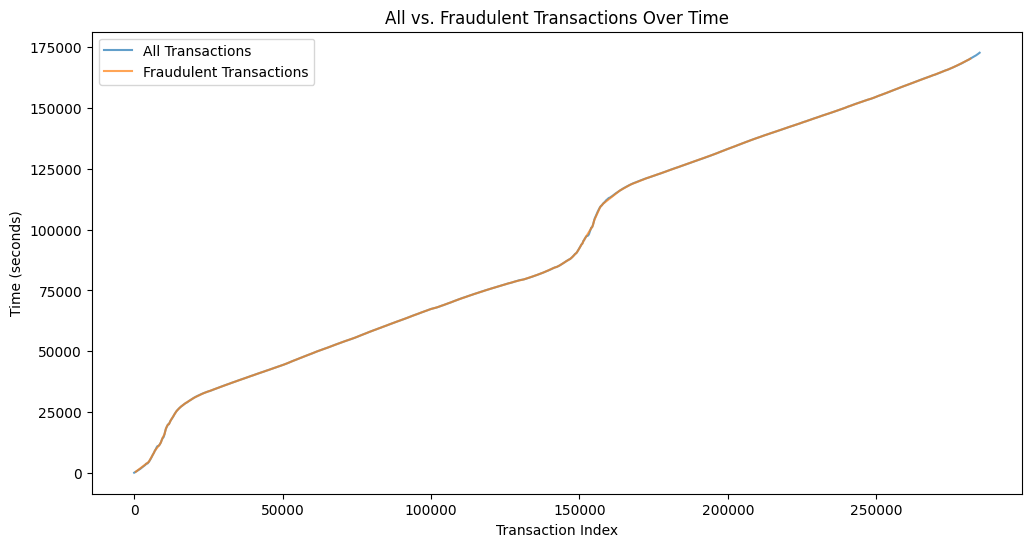

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


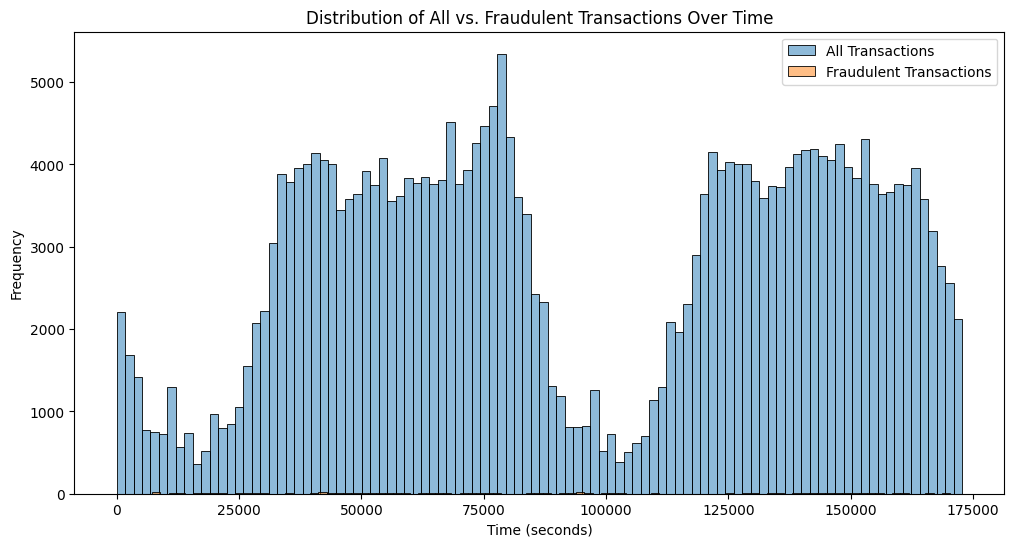

In [17]:
# Compare with Overall Transaction Volume:

# Overlay Line Plots
plt.figure(figsize=(12, 6))
df['Time'].plot(label='All Transactions', alpha=0.7)
fraud_df['Time'].plot(label='Fraudulent Transactions', alpha=0.7)
plt.title('All vs. Fraudulent Transactions Over Time')
plt.xlabel('Transaction Index')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()

# Overlay Histograms
plt.figure(figsize=(12, 6))
sns.histplot(df['Time'], bins=100, label='All Transactions', alpha=0.5)
sns.histplot(fraud_df['Time'], bins=100, label='Fraudulent Transactions', alpha=0.5)
plt.title('Distribution of All vs. Fraudulent Transactions Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### 5. Overlay: All vs. Fraudulent Transactions (Line Plot)

**Observations:**

* **Near-Perfect Overlap:** Fraudulent transactions are proportionally distributed.
* **Consistent Patterns:** Both plots show similar patterns.
* **Proportional Distribution:** Fraud rate is roughly constant.

**Interpretation:**

* **No Time-Based Separation:** Fraud is uniformly distributed.
* **Fraud Rate Stability:** Fraud rate is relatively stable.
* **Time as Weak Predictor:** Time alone is not a strong predictor.

---

### 6. Overlay: All vs. Fraudulent Transactions (Histogram)

**Observations:**

* **Proportional Distribution:** Fraudulent transactions are proportional to overall transactions.
* **Peaks and Valleys Alignment:** Peaks and valleys align.
* **Low Activity Period:** Low activity period is evident in both.
* **Rarity of Fraud:** Fraudulent transactions are rare.

**Interpretation:**

* **Consistent Fraud Rate:** Fraud rate is consistent over time.
* **Time as Weak Predictor:** Time alone is not a strong predictor.
* **Impact of Overall Activity:** Fraud follows overall activity patterns.


In [18]:
# Look into the Low Activity Period Around 100,000 Seconds:

low_activity_df = df[(df['Time'] > 90000) & (df['Time'] < 110000)]
fraud_low_activity_df = fraud_df[(fraud_df['Time'] > 90000) & (fraud_df['Time'] < 110000)]

# Analyze features in low_activity_df and fraud_low_activity_df
print(low_activity_df.describe())
print(fraud_low_activity_df.describe())

                Time           V1           V2           V3           V4  \
count    8988.000000  8988.000000  8988.000000  8988.000000  8988.000000   
mean    99211.007232     0.186069     0.295462    -0.231264     0.361148   
std      6156.796498     2.179153     1.751582     1.928406     1.692921   
min     90001.000000   -34.549296   -60.464618   -30.177317    -4.852956   
25%     94020.000000    -0.757373    -0.328729    -1.124064    -0.562018   
50%     97762.000000     0.038508     0.277011    -0.205587     0.146020   
75%    104933.500000     1.959059     0.944127     0.714174     0.684425   
max    109997.000000     2.439207    22.057729     4.069865    16.875344   

                V5           V6           V7           V8           V9  ...  \
count  8988.000000  8988.000000  8988.000000  8988.000000  8988.000000  ...   
mean      0.411209     0.016851    -0.006865    -0.219289     1.529700  ...   
std       1.543688     1.366351     1.850721     1.406540     1.198091  ...   

**Key Observations and Interpretations:**

* **Fraud Persistence:** Fraud occurs even during low activity.
* **Amount Variation:** Wide variation in transaction amounts.
* **V Variable Difference:** Large difference in means of V variables between overall and fraudulent data.
* **Potential for Feature Engineering:** Differences in V variable distributions are valuable.

**Next Steps:**

* Visualize feature distributions.
* Perform statistical tests.
* Feature engineering based on V variable differences.
* Model evaluation with focus on low activity times.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


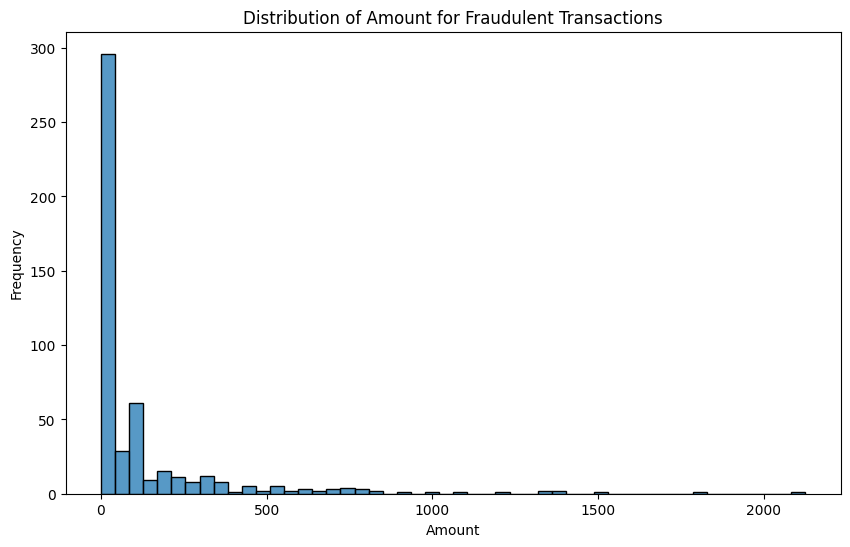

In [19]:
# Distribution of Amount for Fraudulent Transactions
plt.figure(figsize=(10, 6))
sns.histplot(fraud_df['Amount'], bins=50)
plt.title('Distribution of Amount for Fraudulent Transactions')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

## Distribution of Amount for Fraudulent Transactions

**Observations:**

* **Extreme Right Skewness:** Most fraudulent transactions are for small amounts.
* **Long Tail:** Indicates the presence of some larger fraudulent transactions.
* **Concentration at Low Values:** High frequency of fraudulent transactions close to zero.
* **Few High-Value Fraudulent Transactions:** Very few transactions above approximately 500.

**Interpretation:**

* **Low-Value Fraud Dominance:** Most fraudulent transactions are for small amounts.
* **Outliers:** Long tail confirms the presence of outliers.
* **Potential for Thresholding:** Thresholding might be useful for identifying potential fraud.
* **Impact on Modeling:** Skewness and outliers can negatively impact model performance.

**Next Steps:**

* Implement outlier handling strategies.
* Consider data transformation.
* Investigate high-value fraudulent transactions.
* Feature engineering to capture low-value fraud.
* Choose models robust to outliers and skewness.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

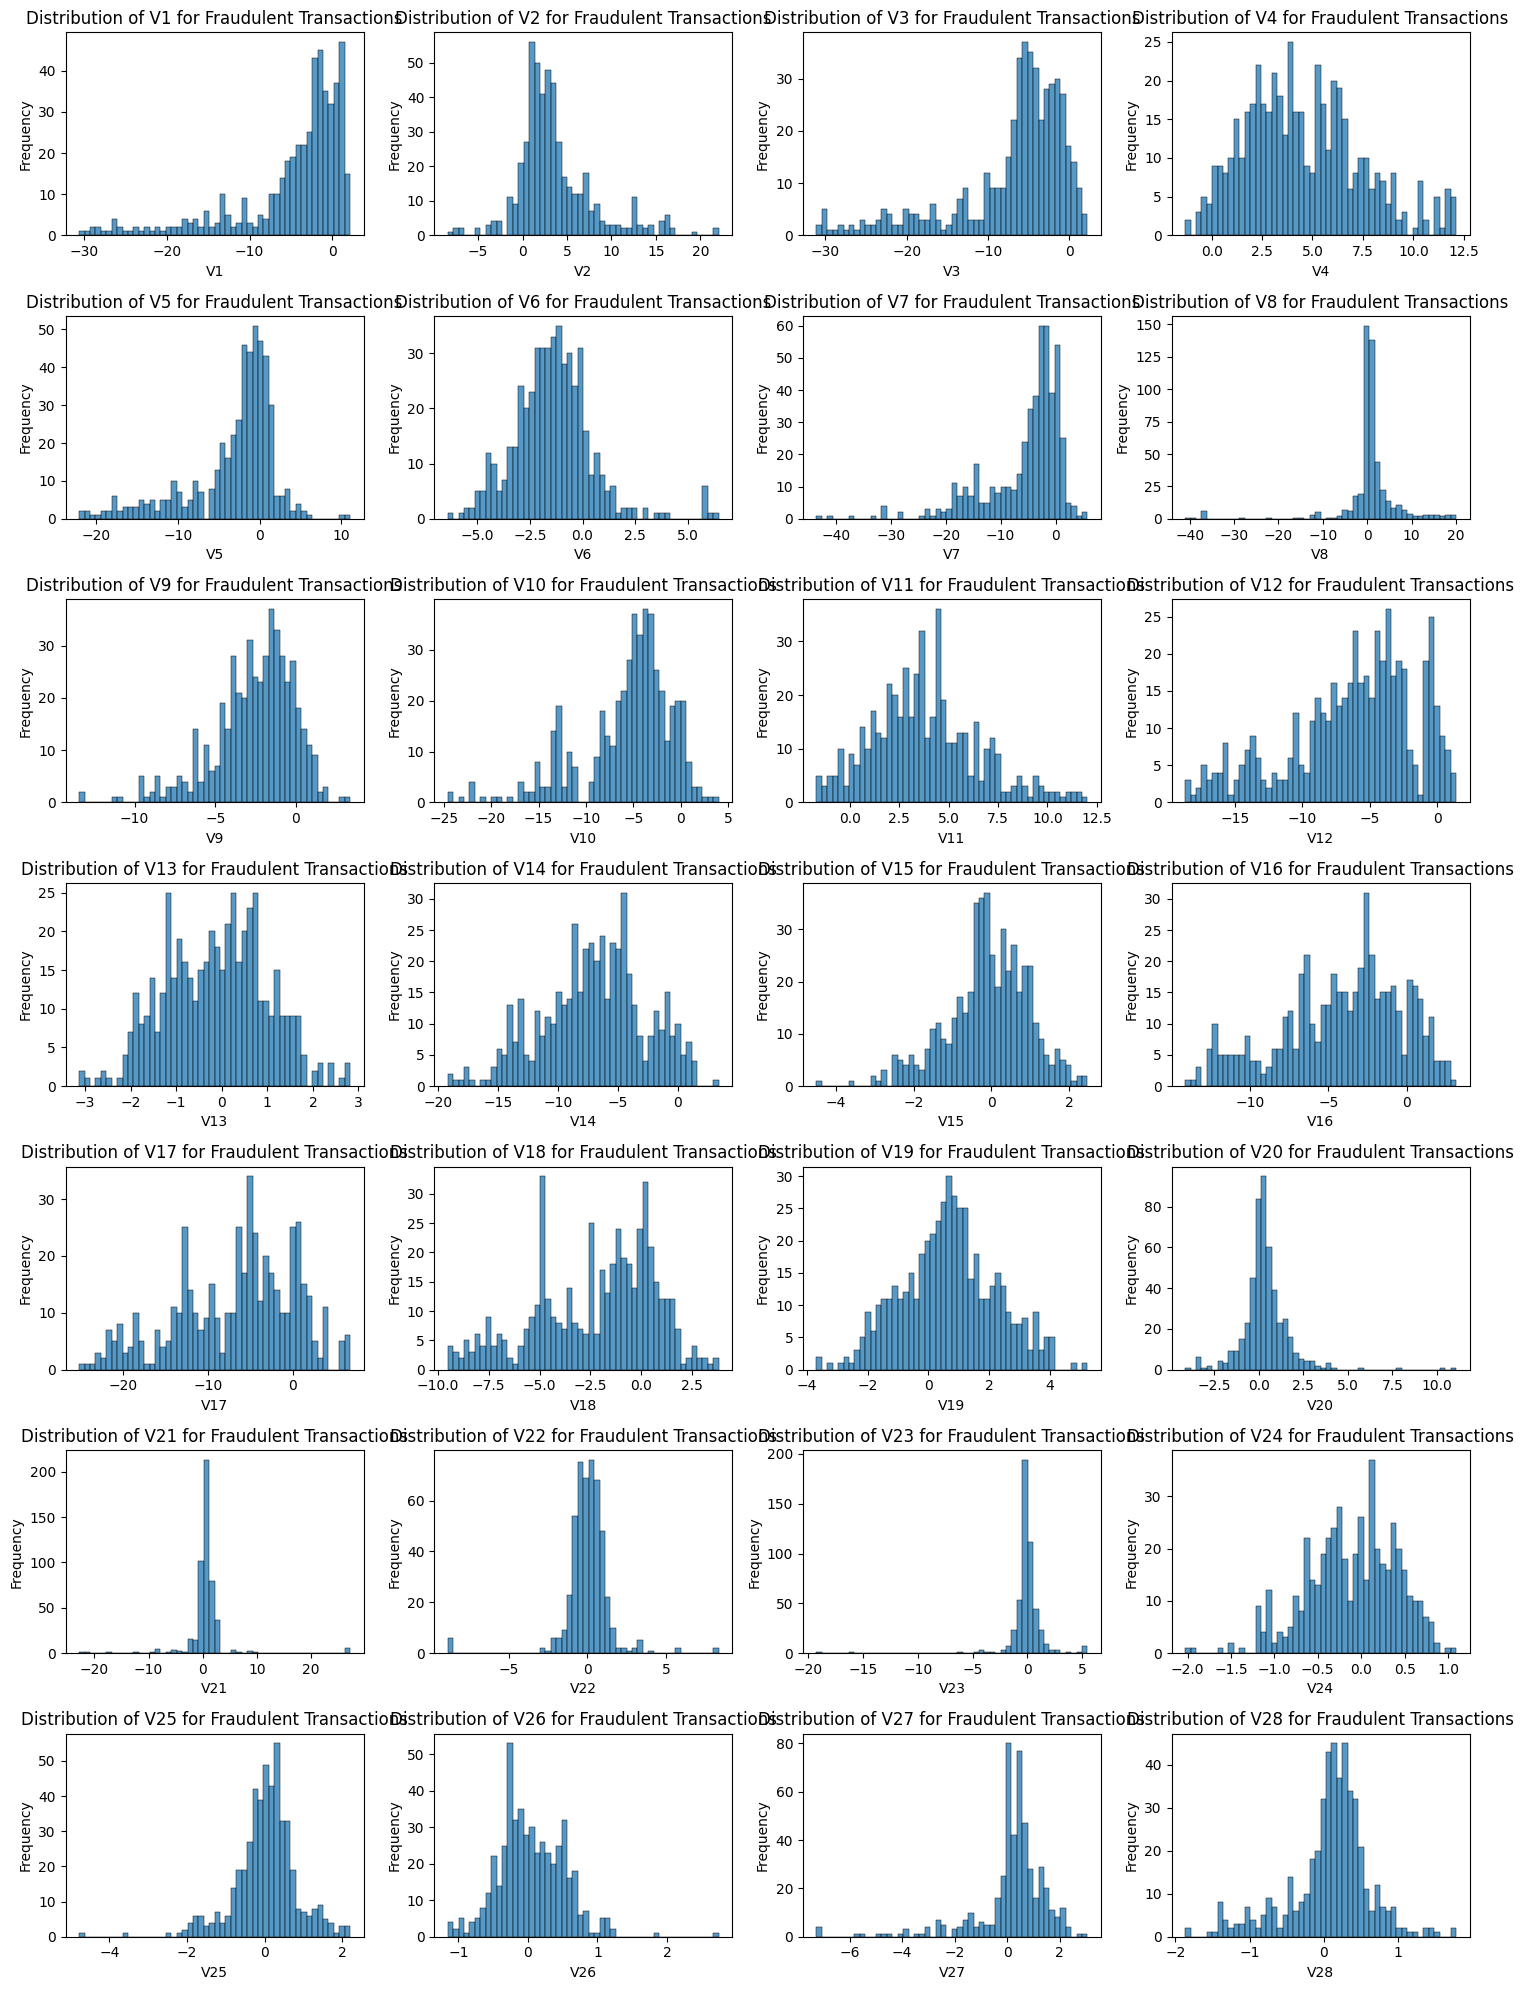

In [20]:
# Distributions of V Variables (Example: V1, V2, V3)
v_vars = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
          'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
          'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

plt.figure(figsize=(15, 20))
for i, var in enumerate(v_vars):
    plt.subplot(7, 4, i + 1)
    sns.histplot(fraud_df[var], bins=50)
    plt.title(f'Distribution of {var} for Fraudulent Transactions')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Analysis of V1 to V28 Distributions for Fraudulent Transactions

**Overall Takeaways:**

The histograms of features V1 to V28 for fraudulent transactions reveal a variety of distribution patterns, indicating that each feature captures unique aspects of fraudulent behavior. Understanding these distributions is crucial for effective fraud detection modeling.

**Detailed Analysis:**

* **V1 to V6:**
    * These features generally exhibit distributions that are somewhat close to normal, but with varying degrees of skewness.
    * There are noticeable tails in some of these distributions, suggesting the presence of potential outliers.
* **V7 to V11:**
    * Similar to the previous group, these features show a mix of near-normal and skewed distributions.
    * V7 and V8 show a high presence of outliers.
    * V11 shows a distribution with a few high values.
* **V12 to V16:**
    * These features tend to display distributions that are closer to normal, but still with some skewness.
    * There is a presence of outliers.
* **V17 to V20:**
    * These features continue the trend of near-normal distributions with slight skewness.
    * V17 and V19 are skewed to the left. V18 and V20 are skewed to the right.
* **V21 to V24:**
    * V21 and V23 are highly skewed, with long tails, indicating the presence of significant outliers.
    * V22 and V24 are closer to normal, but still skewed.
* **V25 to V28:**
    * These features generally show distributions that are closer to normal, but with some skewness.
    * V27 is highly skewed.

**Key Observations:**

* **Skewness:** Many of the V features exhibit skewness, indicating that the data is not symmetrically distributed. This is particularly pronounced in V21, V23, and V27.
* **Outliers:** The presence of long tails in several distributions suggests the existence of outliers, which could significantly impact model performance.
* **Variability:** The distributions vary in shape and spread, highlighting the diverse nature of the information captured by these features.

**Implications for Modeling:**

* **Outlier Handling:** Robust outlier handling techniques are necessary to mitigate the impact of extreme values.
* **Data Transformation:** Applying appropriate data transformations (e.g., logarithmic, Box-Cox) can help reduce skewness and improve the normality of the distributions.
* **Feature Selection/Engineering:** Feature selection or engineering may be beneficial to identify and leverage the most informative V features for fraud detection.
* **Model Choice:** Models that are robust to non-normality and outliers (e.g., tree-based models) may be more suitable for this dataset.

**Next Steps:**

* Quantify skewness and kurtosis.
* Implement outlier detection and handling.
* Explore data transformations to normalize distributions.
* Investigate feature importance using techniques like feature importance scores from tree-based models.
* Compare these distributions with the distributions of the same features for non-fraudulent transactions.

In [21]:
print("Descriptive Statistics for Amount (Fraudulent Transactions):")
print(fraud_df['Amount'].describe())

print("\nDescriptive Statistics for V Variables (Fraudulent Transactions):")
print(fraud_df[v_vars].describe())

Descriptive Statistics for Amount (Fraudulent Transactions):
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Descriptive Statistics for V Variables (Fraudulent Transactions):
               V1          V2          V3          V4          V5          V6  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  492.000000   
mean    -4.771948    3.623778   -7.033281    4.542029   -3.151225   -1.397737   
std      6.783687    4.291216    7.110937    2.873318    5.372468    1.858124   
min    -30.552380   -8.402154  -31.103685   -1.313275  -22.105532   -6.406267   
25%     -6.036063    1.188226   -8.643489    2.373050   -4.792835   -2.501511   
50%     -2.342497    2.717869   -5.075257    4.177147   -1.522962   -1.424616   
75%     -0.419200    4.971257   -2.276185    6.348729    0.214562   -0.413216   
max      2.132386   22.0577

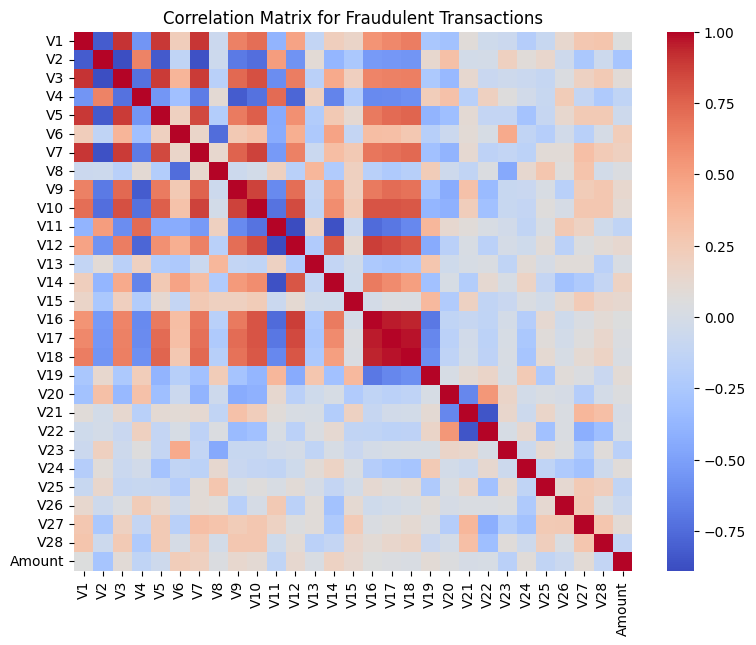

In [22]:
# Correlation Matrix for Fraudulent Transactions
plt.figure(figsize=(9, 7))
sns.heatmap(fraud_df[v_vars + ['Amount']].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix for Fraudulent Transactions')
plt.show()

## Correlation Matrix for Fraudulent Transactions

**Observations:**

* **Strong Positive Correlations:** High correlations between features like V2 and V4, V11 and V4, V12 and V14, V16 and V2, etc.
* **Strong Negative Correlations:** High negative correlations between features like V3 and V10, V7 and V3, V10 and V12, etc.
* **Moderate Correlations:** Various moderate positive and negative correlations.
* **Low Correlations with Amount:** "Amount" shows low correlations with most "V" variables.

**Interpretation:**

* **Feature Redundancy:** Strong correlations suggest potential redundancy.
* **Feature Interactions:** Correlations indicate potential feature interactions.
* **V Feature Importance:** "V" features capture complex fraud patterns.
* **Potential for Feature Selection:** Feature selection may be useful.

**Next Steps:**

* Quantify correlations.
* Address multicollinearity.
* Feature engineering.
* Feature selection.
* Investigate reasons for strong correlations.

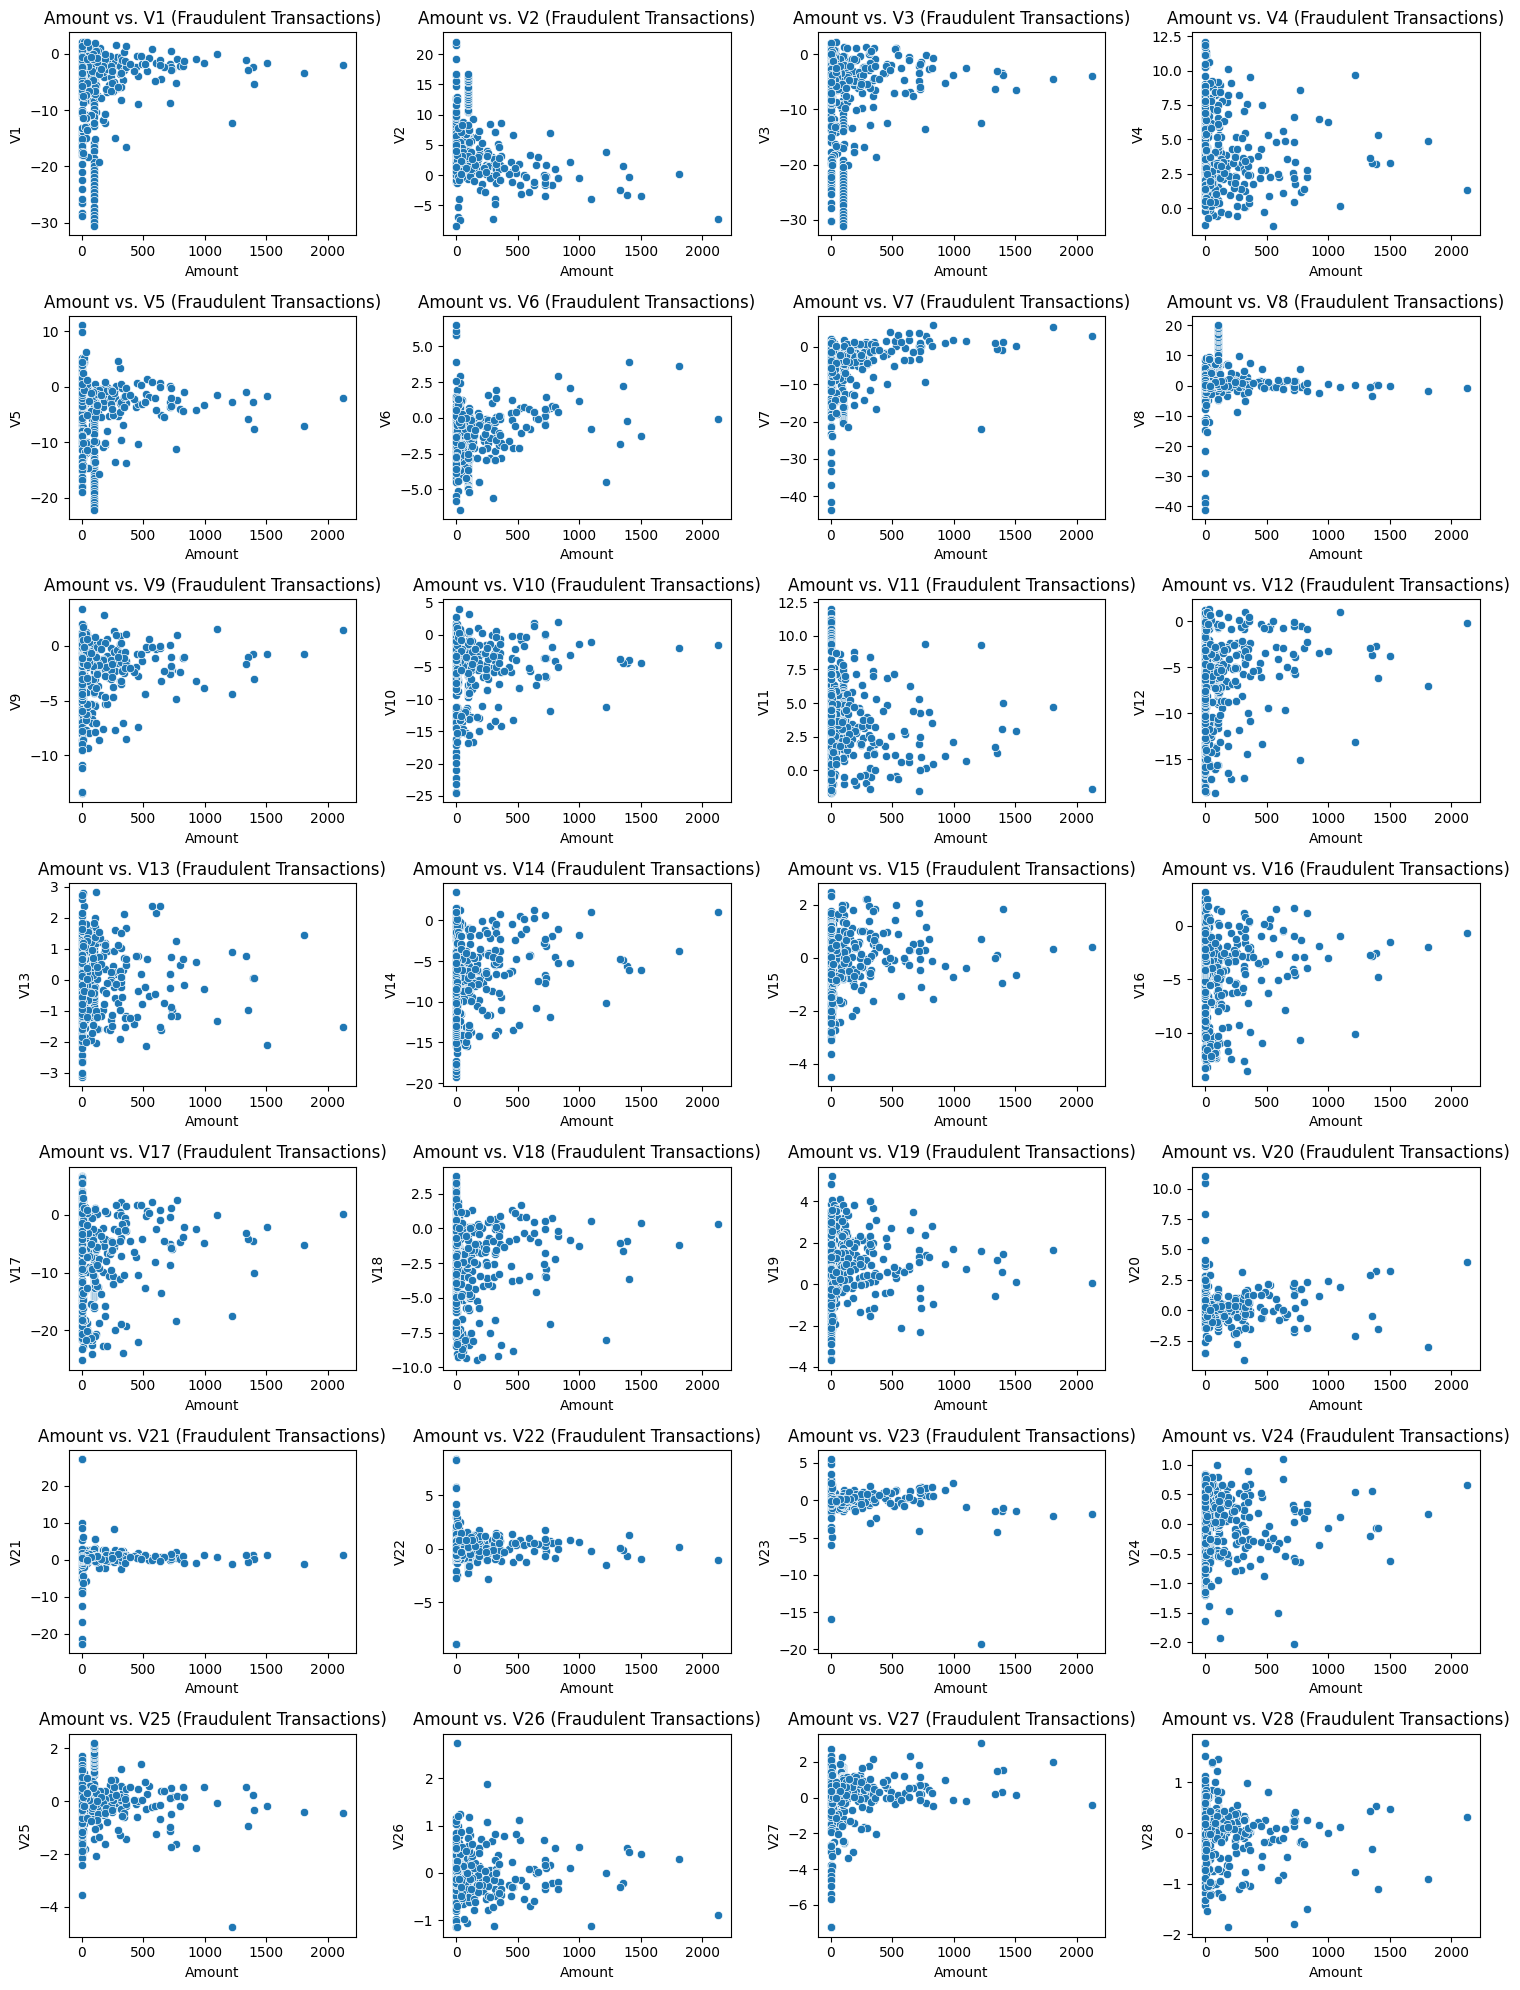

In [23]:
# Scatter plots of V variables vs. Amount for Fraudulent Transactions
plt.figure(figsize=(15, 20))
for i, var in enumerate(v_vars):
    plt.subplot(7, 4, i + 1)
    sns.scatterplot(x='Amount', y=var, data=fraud_df)
    plt.title(f'Amount vs. {var} (Fraudulent Transactions)')
    plt.xlabel('Amount')
    plt.ylabel(var)
plt.tight_layout()
plt.show()

## Scatter Plots: Amount vs. V1 to V28 for Fraudulent Transactions

This section provides an analysis of the scatter plots showing the relationship between the "Amount" feature and each of the "V" features (V1 to V28) for fraudulent transactions. These plots help visualize potential patterns and dependencies between the transaction amount and the anonymized features.

**General Observations:**

* **Low Correlation with Amount:** Generally, there's a weak correlation between "Amount" and most of the "V" features. This suggests that the transaction amount alone is not a strong predictor of fraud.
* **Clustering:** Many plots show clustering of data points, indicating that fraudulent transactions tend to occur within specific ranges of "V" values.
* **Outliers:** Some plots reveal potential outliers, where a few data points are far from the main cluster.

**Detailed Analysis:**

**V1 to V6:**

* **V1:** Data points are scattered, showing no clear pattern.
* **V2:** A slight negative trend, with higher "V2" values tending to correspond to lower "Amount" values.
* **V3:** Similar to V1, no clear pattern is observed.
* **V4:** Data points are clustered, with a few outliers.
* **V5:** Scattered distribution, with a few data points at higher "Amount" values.
* **V6:** No clear relationship is visible.

**V7 to V12:**

* **V7:** Data points are clustered at lower "Amount" values, with a few outliers.
* **V8:** Similar to V7, clustering at lower "Amount" values.
* **V9:** No strong relationship is observed.
* **V10:** Clustering at lower "Amount" values, with a few outliers.
* **V11:** Clustered distribution, with a few data points at higher "Amount" values.
* **V12:** No clear relationship is observed.

**V13 to V18:**

* **V13:** Data points are scattered, with no clear trend.
* **V14:** Clustering at lower "Amount" values, with a few outliers.
* **V15:** No clear relationship is observed.
* **V16:** Clustering at lower "Amount" values.
* **V17:** Clustered distribution, with a few data points at higher "Amount" values.
* **V18:** Clustering at lower "Amount" values, with a few outliers.

**V19 to V24:**

* **V19:** No clear relationship is observed.
* **V20:** Clustering at lower "Amount" values, with a few outliers.
* **V21:** Data points are highly clustered at lower "Amount" values, with a few extreme outliers.
* **V22:** Clustered distribution, with a few data points at higher "Amount" values.
* **V23:** Data points are highly clustered at lower "Amount" values, with a few extreme outliers.
* **V24:** Clustered distribution, with a few data points at higher "Amount" values.

**V25 to V28:**

* **V25:** Data points are clustered at lower "Amount" values.
* **V26:** Clustered distribution, with a few data points at higher "Amount" values.
* **V27:** Data points are highly clustered at lower "Amount" values, with a few extreme outliers.
* **V28:** Clustered distribution, with a few data points at higher "Amount" values.

**Key Takeaways:**

* The "V" features, in general, show weak correlation with "Amount," indicating that fraudulent transactions are not solely determined by the transaction amount.
* Clustering patterns suggest that specific ranges of "V" values may be associated with fraudulent behavior.
* The presence of outliers in several plots highlights the need for robust outlier handling techniques.

**Implications for Modeling:**

* Feature engineering might be necessary to capture non-linear relationships and interactions between "Amount" and the "V" features.
* Outlier handling is crucial to prevent extreme values from negatively impacting model performance.
* Models that are robust to non-linear relationships and outliers should be considered.
* It is very important to note the extreme clumping of data at the lower amount levels, and the corresponding V values. This will be very helpful when creating a model.

**Next Steps:**

* Quantify the correlations between "Amount" and each "V" feature.
* Implement outlier detection and handling.
* Explore feature engineering techniques to create interaction features.
* Consider using models that are robust to non-linear relationships and outliers.

## Comprehensive Analysis of Credit Card Fraud Data

This document summarizes the comprehensive analysis performed on the credit card fraud dataset, highlighting key findings and outlining the next steps for building a robust fraud detection model.

## Executive Summary

The analysis began with an exploration of the overall transaction patterns over time, revealing a non-linear increase in transaction volume and a distinct low activity period. Subsequently, we focused on fraudulent transactions, observing that they are proportionally distributed throughout the dataset. In-depth analysis of fraudulent transactions revealed:

* **Amount Distribution:** Fraudulent transactions are predominantly for small amounts, exhibiting extreme right skewness.
* **V Variable Distributions:** The anonymized "V" variables display diverse distribution patterns, including skewness and outliers, indicating they capture unique aspects of fraudulent behavior.
* **Correlations:** Strong correlations exist among some "V" variables, suggesting potential feature redundancy. "Amount" shows a weak correlation with the "V" variables.
* **Scatter Plots:** Scatter plots of "Amount" vs. "V" variables further confirmed the weak correlation and revealed clustering patterns, indicating specific ranges of "V" values associated with fraud.

## Key Findings

* Fraudulent transactions are not concentrated in specific time periods but occur throughout the dataset.
* The transaction "Amount" is a critical feature, with most fraudulent transactions being for small values.
* The anonymized "V" variables are essential for fraud detection, capturing complex relationships and patterns.
* Outliers and skewness are prevalent in both "Amount" and the "V" variables, necessitating robust handling.
* There is a high clumping of data points at the lower end of the "Amount" scale, in the scatter plots.

## Next Steps

To build an effective fraud detection model, we will undertake the following steps:

1.  **Outlier Handling:** Implement appropriate techniques to identify and manage outliers in "Amount" and the "V" variables.
2.  **Data Transformation:** Apply transformations (e.g., logarithmic, Box-Cox) to reduce skewness and improve the normality of distributions.
3.  **Feature Engineering:** Create new features based on the "V" variables, including interaction features and polynomial features, to capture complex relationships.
4.  **Feature Selection:** Employ feature selection methods to identify the most informative features and reduce redundancy.
5.  **Model Selection:** Choose machine learning models that are robust to outliers and skewed data, considering the class imbalance.
6.  **Model Evaluation:** Utilize appropriate evaluation metrics (e.g., precision, recall, F1-score, AUC-ROC) to assess model performance.
7.  **Address Class Imbalance:** Implement techniques to mitigate the impact of the class imbalance (e.g., oversampling, undersampling, SMOTE).
8.  **Focused Low Amount Modelling:** Due to the clumping of fraudulant data at the lower end of the amount scale, create models focused on this area of the data, to increase detection.

By executing these steps, we aim to develop a high-performing fraud detection model that effectively identifies fraudulent transactions and minimizes false positives.

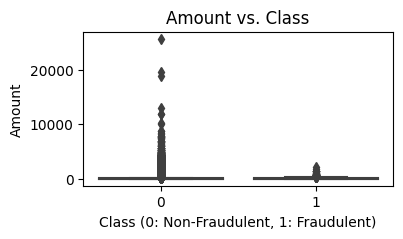

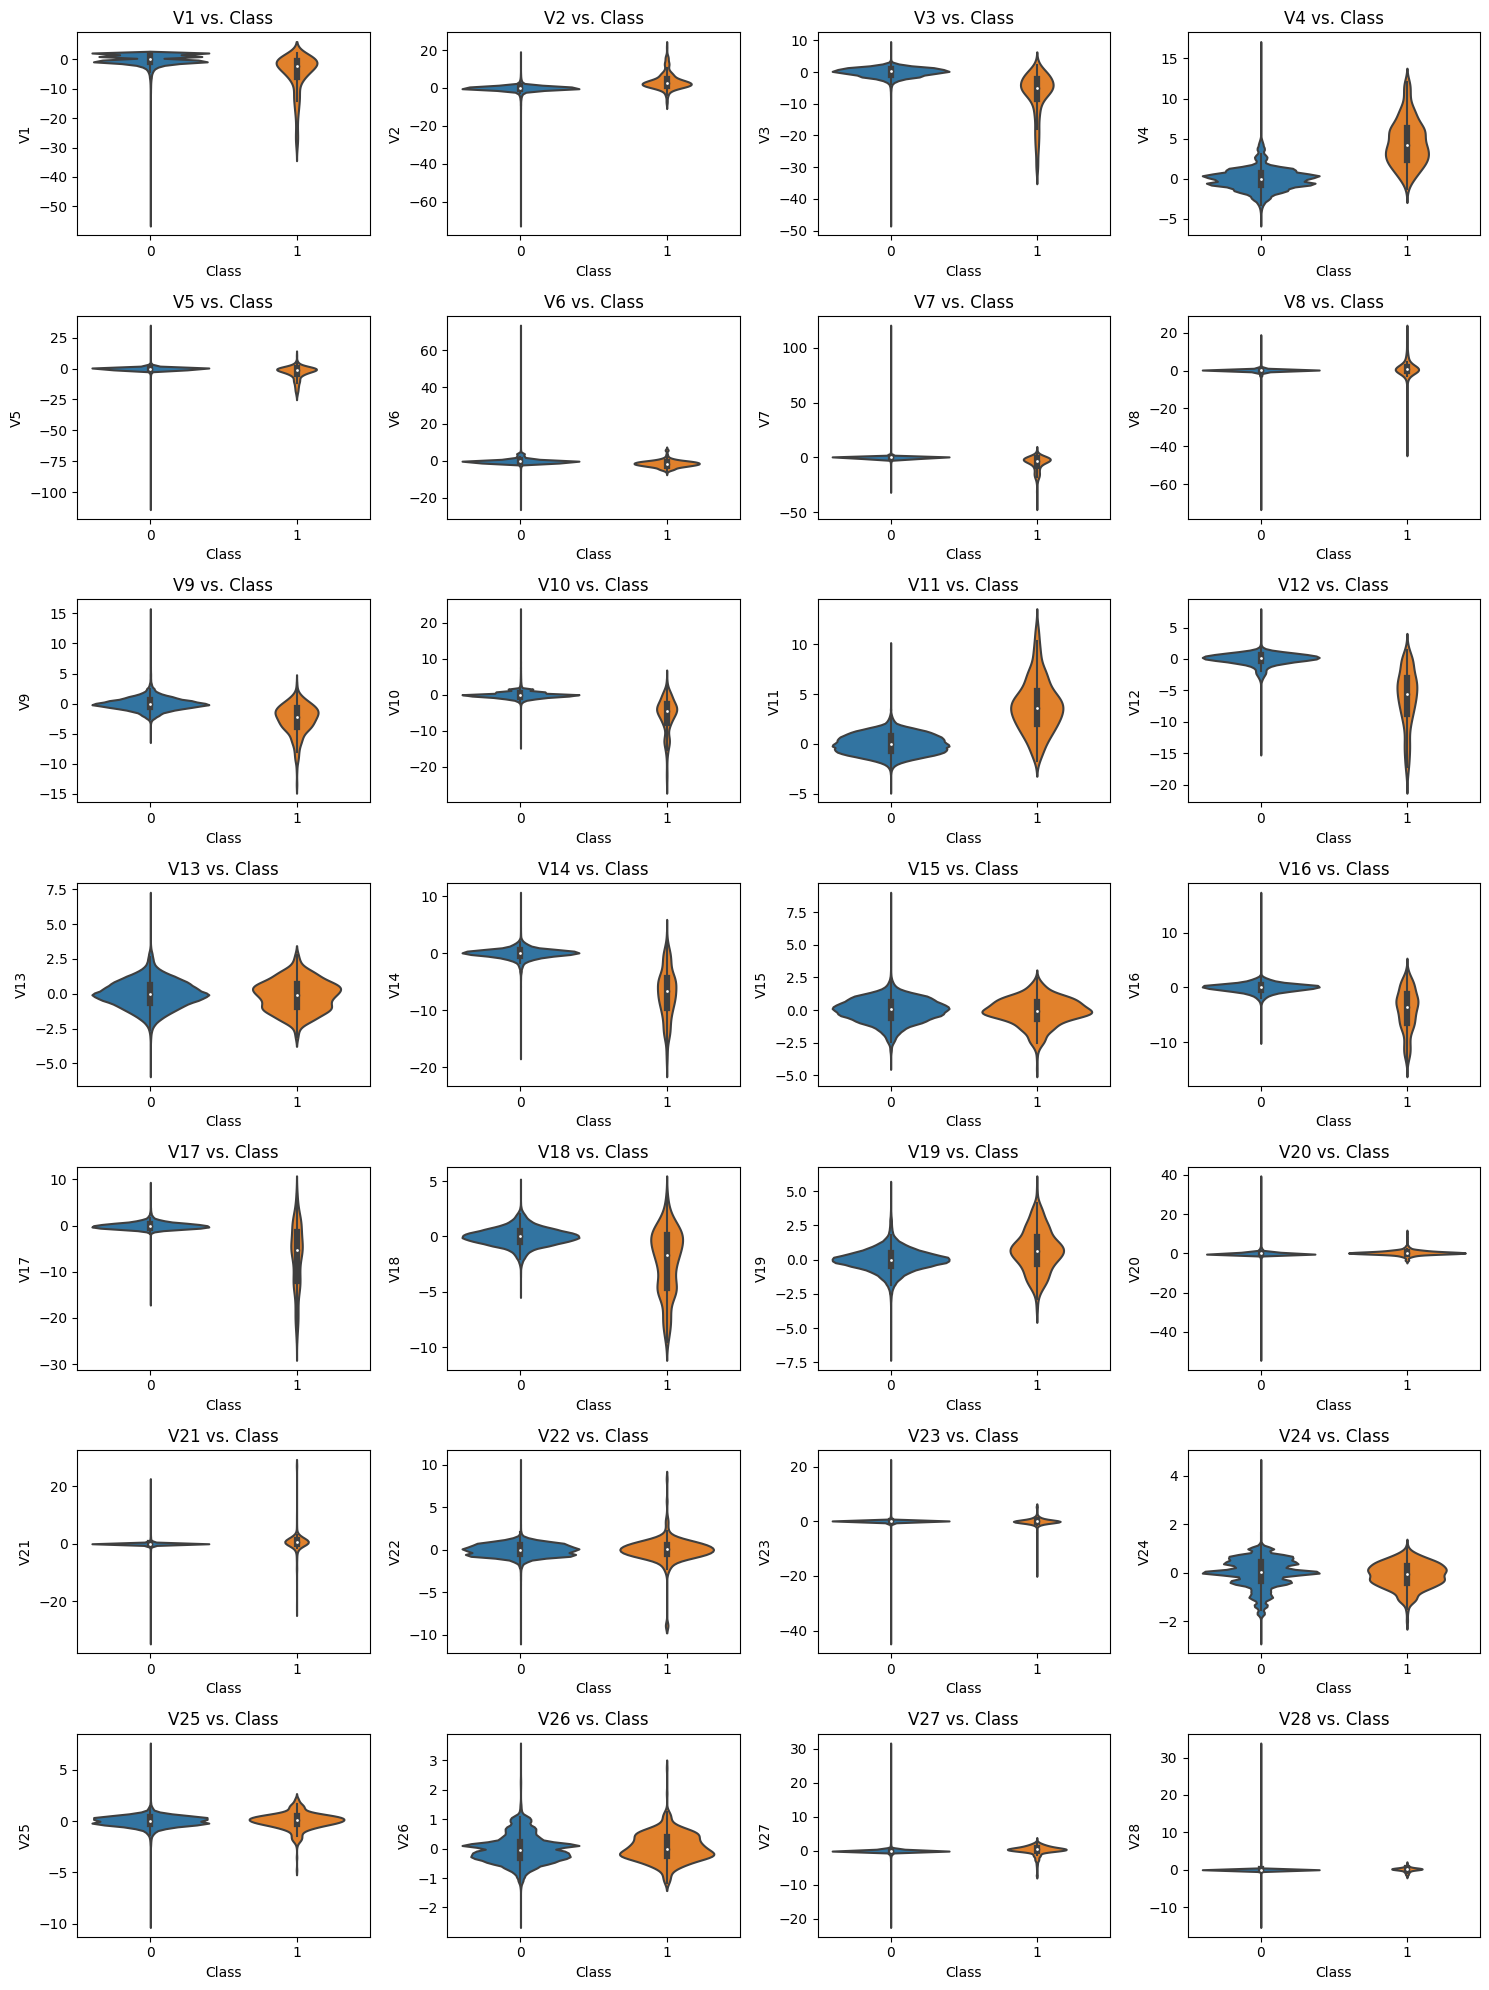

In [24]:
# Box Plot for Amount vs. Class
plt.figure(figsize=(4, 2))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Amount vs. Class')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Amount')
plt.show()

# Violin Plots for V Variables vs. Class (Example: V1, V2, V3)
v_vars = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
          'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
          'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

plt.figure(figsize=(15, 20))
for i, var in enumerate(v_vars):
    plt.subplot(7, 4, i + 1)
    sns.violinplot(x='Class', y=var, data=df)
    plt.title(f'{var} vs. Class')
    plt.xlabel('Class')
    plt.ylabel(var)
plt.tight_layout()
plt.show()

## Box Plot: Amount vs. Class

**Observations:**

* **Non-Fraudulent:** Wide range of "Amount" values, numerous extreme outliers.
* **Fraudulent:** Narrow range of "Amount" values, few outliers, predominantly low values.
* **Significant Difference:** Clear separation between classes based on "Amount".

**Interpretation:**

* **Low-Value Fraud:** Fraudulent transactions are mostly for low amounts.
* **Outliers in Non-Fraudulent:** High-value legitimate transactions exist.
* **Discriminative Feature:** "Amount" is a strong discriminator.

**Next Steps:**

* Quantify outliers.
* Investigate outliers.
* Implement outlier handling.
* Analyze "V" variable distributions by class.


## Violin Plots: V1 to V28 vs. Class

**Observations:**

* Distinct distributions between classes for many V variables.
* Skewness and tails in several variables.
* Width differences between classes indicate distribution variations.

**Key Takeaways:**

* V variables are highly discriminative.
* Distribution shifts vary across V variables.
* Outlier handling and data transformation are needed.

**Implications for Modeling:**

* V variables are crucial.
* Feature selection and engineering are beneficial.
* Robust models are needed.

In [25]:
# Further Numerical Analysis (Percentiles, IQR, Z-scores):


from scipy import stats

# Amount Percentiles
amount_percentiles = np.percentile(df['Amount'], [95, 99])
print(f"95th Percentile of Amount: {amount_percentiles[0]}")
print(f"99th Percentile of Amount: {amount_percentiles[1]}")

# IQR for Amount
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"IQR Lower Bound for Amount: {lower_bound}")
print(f"IQR Upper Bound for Amount: {upper_bound}")

# Z-scores for Amount
z_scores = stats.zscore(df['Amount'])
outlier_threshold = 3 # Adjust threshold as needed
outliers_z = df['Amount'][np.abs(z_scores) > outlier_threshold]
print(f"Number of Z-score Outliers (Threshold {outlier_threshold}): {len(outliers_z)}")

95th Percentile of Amount: 365.0
99th Percentile of Amount: 1017.9700000000012
IQR Lower Bound for Amount: -101.7475
IQR Upper Bound for Amount: 184.5125
Number of Z-score Outliers (Threshold 3): 4076


## Further Numerical Analysis of "Amount" for Outlier Detection

This section presents the results of numerical analysis performed on the "Amount" feature to identify potential outliers using percentiles, the Interquartile Range (IQR), and Z-scores.

**1. Percentiles:**

* **95th Percentile:** 365.0
    * This indicates that 95% of the transactions have an "Amount" of 365.0 or less.
* **99th Percentile:** 1017.97
    * This indicates that 99% of the transactions have an "Amount" of approximately 1017.97 or less.

**Interpretation:**

* Transactions with "Amount" values exceeding 365.0 are in the top 5% of the data.
* Transactions with "Amount" values exceeding 1017.97 are in the top 1% of the data.
* These percentiles can be used as potential thresholds for identifying high-value outliers.

**2. IQR (Interquartile Range):**

* **IQR Lower Bound:** -101.7475
    * Since transaction amounts cannot be negative, this lower bound is not practically relevant.
* **IQR Upper Bound:** 184.5125
    * Transactions with "Amount" values exceeding 184.51 are considered outliers based on the IQR method.

**Interpretation:**

* The IQR method identifies a significant number of transactions as outliers due to its restrictive nature.
* It is very important to note that the IQR method is not always the best method to use on highly skewed data.

**3. Z-scores:**

* **Number of Z-score Outliers (Threshold 3):** 4076
    * Using a Z-score threshold of 3, 4076 transactions are identified as outliers.

**Interpretation:**

* A large number of outliers are identified using the Z-score method. This is due to the high skew of the amount data.
* A Z score of 3 means that the data point is 3 standard deviations from the mean.
* Because of the skew of the data, using a Z score of 3 is not a good method for finding outliers in this dataset.

**Summary and Recommendations:**

* The "Amount" feature exhibits a high degree of skewness and contains a significant number of potential outliers.
* The 99th percentile (1017.97) provides a reasonable threshold for identifying extreme outliers.
* The IQR method is to restrictive for this dataset.
* The Z score method is also to restrictive for this dataset.
* Considering the business context, you might want to investigate transactions exceeding the 99th percentile to determine if they are legitimate or fraudulent.
* Given the high skew of the data, consider using robust outlier detection methods or data transformations.

**Next Steps:**

* Investigate the nature of the identified outliers.
* Choose an appropriate outlier handling strategy (removal, capping, transformation).
* Document your findings and decisions.

## 4. Outlier Handling

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


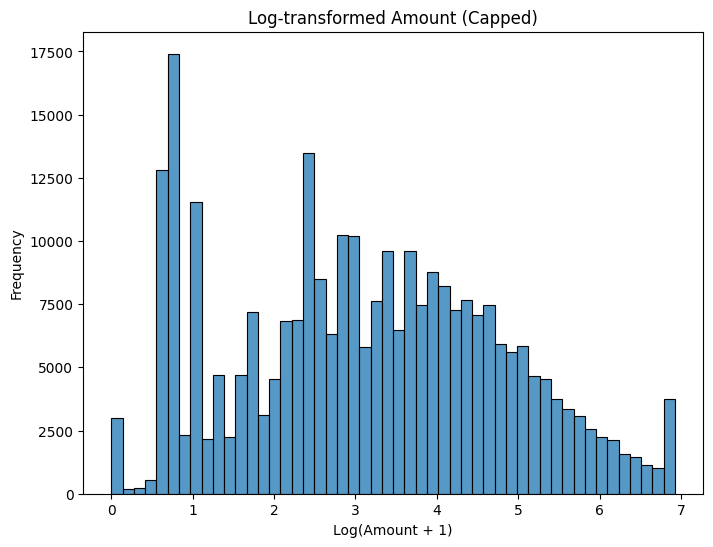

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


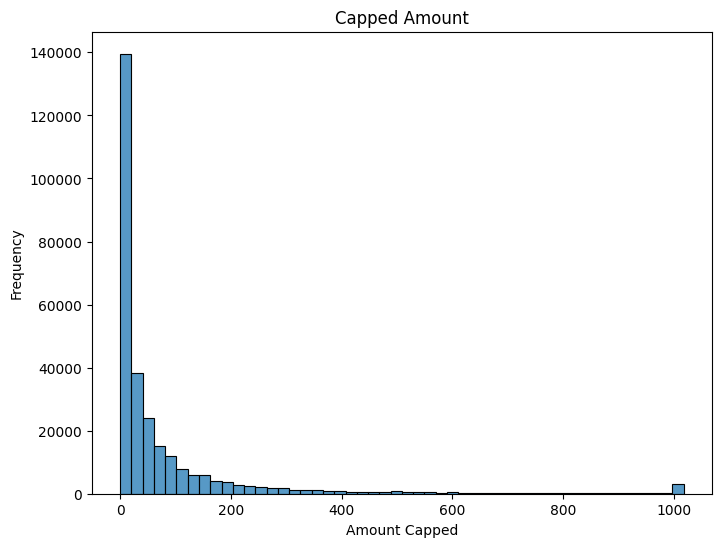

In [26]:
#  Outlier Handling for "Amount":


# Cap outliers at the 99th percentile
amount_99th = 1017.97
df['Amount_capped'] = np.where(df['Amount'] > amount_99th, amount_99th, df['Amount'])

# Log transformation
df['Amount_log'] = np.log1p(df['Amount_capped'])

# Visualize the transformed distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Amount_log'], bins=50)
plt.title('Log-transformed Amount (Capped)')
plt.xlabel('Log(Amount + 1)')
plt.ylabel('Frequency')
plt.show()

#Visualize capped data.
plt.figure(figsize=(8, 6))
sns.histplot(df['Amount_capped'], bins=50)
plt.title('Capped Amount')
plt.xlabel('Amount Capped')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


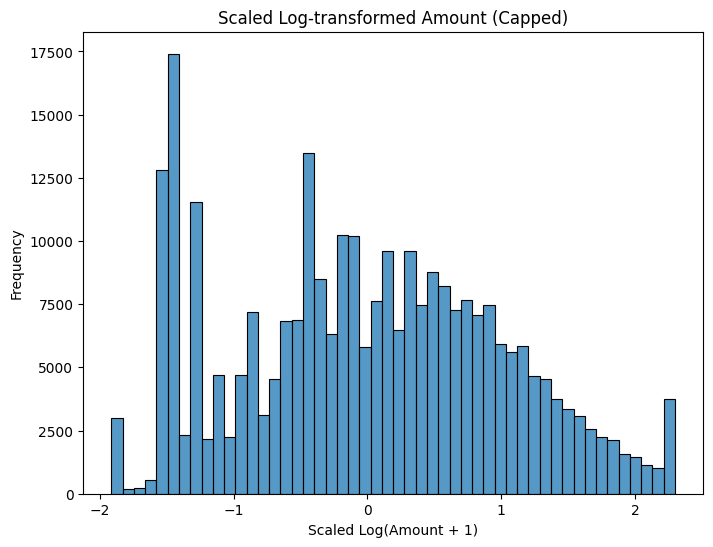

In [27]:
# scale the numerical features.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[v_vars + ['Amount_log']] = scaler.fit_transform(df[v_vars + ['Amount_log']])

#Visualize the scaled data.
plt.figure(figsize=(8, 6))
sns.histplot(df['Amount_log'], bins=50)
plt.title('Scaled Log-transformed Amount (Capped)')
plt.xlabel('Scaled Log(Amount + 1)')
plt.ylabel('Frequency')
plt.show()

## Histogram: Scaled Log-transformed Amount (Capped)

**Observations:**

* Centered around zero.
* Unit variance.
* Retained shape.
* Adjusted range.

**Interpretation:**

* Successful scaling using StandardScaler.
* Ready for modeling.
* No information loss.

**Next Steps:**

* Verify mean and standard deviation.
* Proceed with V variable outlier handling.
* Feature engineering.
* Feature selection.
* Model selection and training.
* Document findings.

In [28]:
# Verify mean and standard deviation.


# Verify mean and standard deviation of the scaled 'Amount_log' feature
mean_scaled_amount = df['Amount_log'].mean()
std_scaled_amount = df['Amount_log'].std()

print(f"Mean of Scaled Amount_log: {mean_scaled_amount}")
print(f"Standard Deviation of Scaled Amount_log: {std_scaled_amount}")

Mean of Scaled Amount_log: 1.4689511241491501e-16
Standard Deviation of Scaled Amount_log: 1.0000017555795242


**"Amount_log" feature has been successfully scaled.**

In [29]:
# Outlier handing V variables

v_vars = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
          'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
          'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

for var in v_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[var] = np.where(df[var] < lower_bound, lower_bound, df[var])
    df[var] = np.where(df[var] > upper_bound, upper_bound, df[var])

## 5. Feature Engineering

In [30]:
from sklearn.preprocessing import PolynomialFeatures


# 1. Interaction Features (Strong Correlations)
# Assuming from your correlation matrix that V12 and V14, V10 and V17 are strongly correlated.
df['V12_V14_interaction'] = df['V12'] * df['V14']
df['V10_V17_interaction'] = df['V10'] * df['V17']

# 2. Features Based on "Amount" Clumping (Low Amount Binary Feature)
df['low_amount'] = np.where(df['Amount'] < 50, 1, 0) # Adjust threshold as needed

# 3. Polynomial Features (Example: V3 and V4)
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly_features = poly.fit_transform(df[['V3', 'V4']])
poly_feature_names = poly.get_feature_names_out(['V3', 'V4'])
df[poly_feature_names] = poly_features

# 4. Time-Based Features (Example: hour of day)
df['hour'] = df['Time'] // 3600  # Assuming Time is in seconds

# 5. Feature Combinations (Example: Amount with V2)
df['amount_V2_combined'] = df['Amount'] * df['V2']

## Feature Engineering

This section describes the feature engineering techniques applied to the credit card fraud dataset.

**1. Interaction Features (V12_V14_interaction, V10_V17_interaction):**

* **Rationale:** The correlation matrix revealed strong correlations between V12 and V14, as well as V10 and V17. Creating interaction features by multiplying these pairs captures potential non-linear relationships that might be indicative of fraudulent behavior.
* **Implementation:**
    * `df['V12_V14_interaction'] = df['V12'] * df['V14']`
    * `df['V10_V17_interaction'] = df['V10'] * df['V17']`
* **Why:** These interactions may reveal patterns that are not apparent when considering the individual features alone, potentially improving the model's ability to discriminate between fraudulent and legitimate transactions.

**2. Features Based on "Amount" Clumping (low_amount):**

* **Rationale:** Scatter plots showed a high concentration of fraudulent transactions at low "Amount" values. Creating a binary feature to indicate whether the "Amount" is below a certain threshold captures this pattern.
* **Implementation:**
    * `df['low_amount'] = np.where(df['Amount'] < 50, 1, 0)` (threshold can be adjusted)
* **Why:** This feature provides a simple yet powerful way to capture the distinct characteristic of low-value fraudulent transactions, potentially serving as a strong predictor.

**3. Polynomial Features (V3, V4):**

* **Rationale:** Polynomial features can capture non-linear relationships between variables. By creating polynomial features for V3 and V4, we can explore potential quadratic or interaction effects.
* **Implementation:**
    * `PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)`
* **Why:** These features can help the model learn more complex decision boundaries and improve its ability to model non-linear patterns.

**4. Time-Based Features (hour):**

* **Rationale:** If the "Time" feature contains meaningful patterns, creating time-based features can be beneficial. In this case, we create an "hour" feature to capture potential hourly variations in transaction behavior.
* **Implementation:**
    * `df['hour'] = df['Time'] // 3600` (assuming "Time" is in seconds)
* **Why:** Fraudulent activity might exhibit patterns related to the time of day, making this feature potentially informative.

**5. Feature Combinations (amount_V2_combined):**

* **Rationale:** Combining existing features can create new features that are more informative than the original ones. In this case, we combine "Amount" with "V2" to explore potential interactions between transaction amount and a specific anonymized feature.
* **Implementation:**
    * `df['amount_V2_combined'] = df['Amount'] * df['V2']`
* **Why:** This combination might reveal patterns that are not apparent when considering "Amount" and "V2" separately, potentially improving model performance.

**Next Steps:**

* Evaluate the importance of the newly created features using feature importance techniques.
* Iterate on feature engineering based on evaluation results.
* Proceed with feature selection and model building.

## 6. Balancing Data (SMOTE)

In [31]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separate features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verify the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_train_resampled.value_counts())

Class distribution after SMOTE:
Class
0    199008
1    199008
Name: count, dtype: int64


## 7. Feature Selection

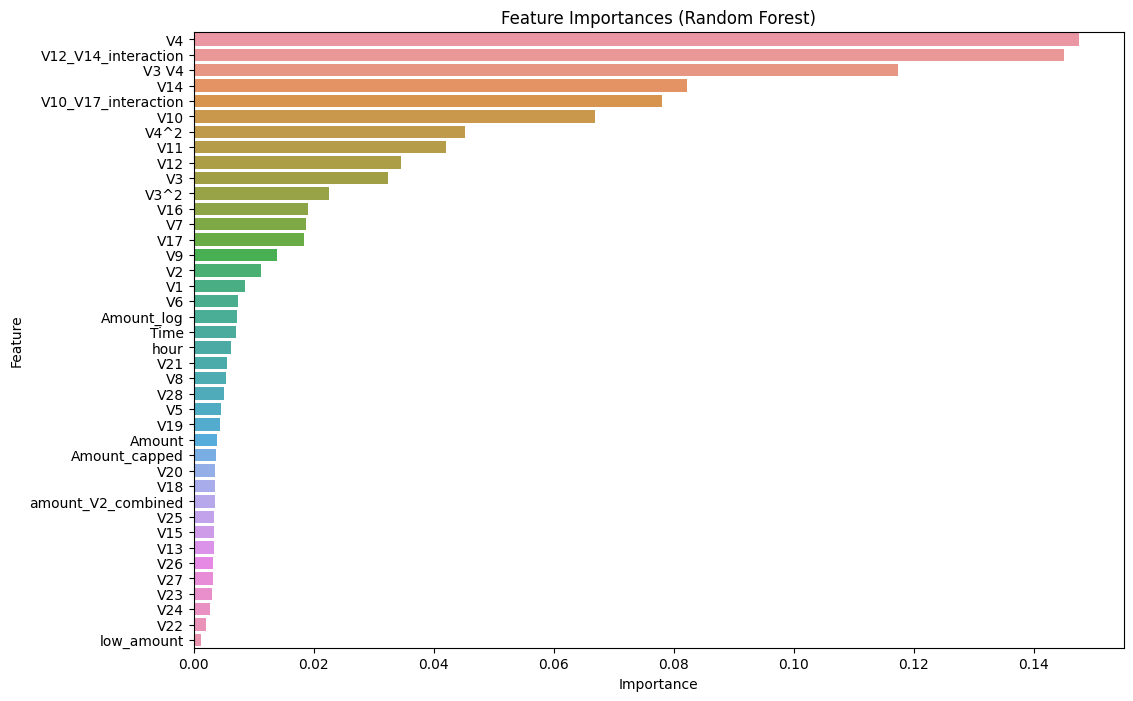

Top 20 Features (Random Forest):
                Feature  Importance
4                    V4    0.147584
32  V12_V14_interaction    0.144948
36                V3 V4    0.117430
14                  V14    0.082126
33  V10_V17_interaction    0.078110
10                  V10    0.066822
37                 V4^2    0.045165
11                  V11    0.041991
12                  V12    0.034539
3                    V3    0.032382
35                 V3^2    0.022515
16                  V16    0.018996
7                    V7    0.018775
17                  V17    0.018405
9                    V9    0.013813
2                    V2    0.011249
1                    V1    0.008555
6                    V6    0.007430
31           Amount_log    0.007216
0                  Time    0.007102


In [32]:
# 1. Feature Importance from Random Forest:


from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (Random Forest)')
plt.show()

# Print top 20 features
print("Top 20 Features (Random Forest):")
print(feature_importance_df.head(20))

In [33]:
# 2. Recursive Feature Elimination (RFE) with Logistic Regression:


from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
lr = LogisticRegression(solver='liblinear', random_state=42)

# Apply RFE
rfe = RFE(lr, n_features_to_select=20)  # Select top 20 features
rfe.fit(X_train_resampled, y_train_resampled)

# Get selected features
selected_features_rfe = X_train_resampled.columns[rfe.support_]

# Print selected features
print("\nSelected Features (RFE with Logistic Regression):")
print(selected_features_rfe)


Selected Features (RFE with Logistic Regression):
Index(['V2', 'V3', 'V4', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16',
       'V17', 'V18', 'V20', 'V28', 'Amount_log', 'V12_V14_interaction',
       'V10_V17_interaction', 'low_amount', 'V3 V4'],
      dtype='object')


This section describes the feature selection process and the selected features for the credit card fraud detection model.

**Methods Used:**

1.  **Feature Importance from Random Forest:**
    * A Random Forest classifier was trained on the balanced training data to obtain feature importance scores.
    * This method captures non-linear relationships and provides insights into the relevance of each feature in predicting the target variable.
2.  **Recursive Feature Elimination (RFE) with Logistic Regression:**
    * A Logistic Regression model was used with RFE to select the top features based on their contribution to the model's performance.
    * This method focuses on linear relationships and iteratively removes less important features.

**Results:**

**Random Forest Feature Importances (Top 20):**

* V4
* V12_V14_interaction
* V3 V4
* V14
* V10_V17_interaction
* V10
* V4^2
* V11
* V12
* V3
* V3^2
* V16
* V7
* V17
* V9
* V2
* V1
* V6
* Amount_log
* Time

**RFE with Logistic Regression (Selected Features):**

* V2
* V3
* V4
* V7
* V8
* V9
* V10
* V11
* V12
* V14
* V16
* V17
* V18
* V20
* V28
* Amount_log
* V12_V14_interaction
* V10_V17_interaction
* low_amount
* V3 V4

**Feature Selection Strategy:**

* **Common Features:** Features selected by both methods were given priority, as they are consistently identified as important.
    * V2, V3, V4, V7, V9, V10, V11, V12, V14, V16, V17, Amount_log, V12_V14_interaction, V10_V17_interaction, V3 V4
* **High-Ranking Random Forest Features:** Features highly ranked by Random Forest were considered to capture non-linear relationships.
    * V4^2, V3^2, V1, V6, Time
* **RFE Exclusives:** Features selected only by RFE were considered, but with caution, especially if they had low importance in Random Forest.
    * V8, V18, V20, V28, low_amount (low_amount was noted to have very low importance in Random Forest)

**Selected Features:**

Based on the analysis, the following features were selected for model training:

* V2, V3, V4, V7, V9, V10, V11, V12, V14, V16, V17, Amount_log, V12_V14_interaction, V10_V17_interaction, V3 V4, V4^2, V3^2, V1, V6, Time, V8, V18, V20, V28

**Next Steps:**

* Train machine learning models using the selected features and the balanced training data.
* Evaluate the models on the original test data.
* Iterate on feature selection based on model performance.
* Document the impact of each feature subset on the chosen evaluation metrics.

## 8. Model Training

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

In [35]:
# Selected features
selected_features = ['V2', 'V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'Amount_log', 'V12_V14_interaction', 'V10_V17_interaction', 'V3 V4', 'V4^2', 'V3^2', 'V1', 'V6', 'Time', 'V8', 'V18', 'V20', 'V28']

# Prepare data
X_train_selected = X_train_resampled[selected_features]
X_test_selected = X_test[selected_features]

In [36]:
# Models
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting Machine': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42)
}

In [37]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_selected, y_train_resampled)
    y_pred = model.predict(X_test_selected)
    report = classification_report(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test_selected)[:, 1])
    results[name] = {'classification_report': report, 'auc': auc}


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 199008, number of negative: 199008
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.055375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6119
[LightGBM] [Info] Number of data points in the train set: 398016, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [38]:
# Print results
for name, result in results.items():
    print(f"Model: {name}")
    print(result['classification_report'])
    print(f"AUC: {result['auc']}\n")

Model: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.07      0.92      0.13       136

    accuracy                           0.98     85443
   macro avg       0.54      0.95      0.56     85443
weighted avg       1.00      0.98      0.99     85443

AUC: 0.9689718414942846

Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.85      0.87       136

    accuracy                           1.00     85443
   macro avg       0.94      0.93      0.93     85443
weighted avg       1.00      1.00      1.00     85443

AUC: 0.980758940546221

Model: Gradient Boosting Machine
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85307
           1       0.18      0.89      0.30       136

    accuracy                           0.99     8544

## Model Comparison and Selection

This section presents the results of comparing five machine learning models for credit card fraud detection and the rationale for selecting the best model.

**Models Compared:**

1.  **Logistic Regression**
2.  **Random Forest**
3.  **Gradient Boosting Machine (GBM)**
4.  **XGBoost (Extreme Gradient Boosting)**
5.  **LightGBM (Light Gradient Boosting Machine)**

**Evaluation Metrics:**

* **Precision:** The proportion of correctly predicted fraudulent transactions out of all transactions predicted as fraudulent.
* **Recall:** The proportion of correctly predicted fraudulent transactions out of all actual fraudulent transactions.
* **F1-Score:** The harmonic mean of precision and recall, providing a balanced measure of the model's performance.
* **AUC (Area Under the ROC Curve):** A measure of the model's ability to distinguish between fraudulent and non-fraudulent transactions.

**Results:**

| Model                      | Precision (Fraud) | Recall (Fraud) | F1-Score (Fraud) | AUC     |
| -------------------------- | ----------------- | -------------- | ---------------- | ------- |
| Logistic Regression        | 0.07              | 0.92           | 0.13             | 0.969   |
| Random Forest              | 0.88              | 0.85           | 0.87             | 0.981   |
| Gradient Boosting Machine  | 0.18              | 0.89           | 0.30             | 0.985   |
| XGBoost                    | 0.85              | 0.88           | 0.86             | 0.978   |
| LightGBM                   | 0.73              | 0.85           | 0.78             | 0.963   |

**Analysis:**

* **Logistic Regression:** High recall but very low precision, indicating many false positives.
* **Random Forest:** Excellent balance between precision and recall, with high F1-score and AUC.
* **Gradient Boosting Machine (GBM):** High recall but very low precision, similar to Logistic Regression.
* **XGBoost:** High precision and recall, with good F1-score and AUC, very similar to Random Forest.
* **LightGBM:** Reasonable recall but lower precision compared to Random Forest and XGBoost.

**Model Selection:**

* **Random Forest and XGBoost** demonstrated the best overall performance, with high precision, recall, F1-score, and AUC.
* **Random Forest** was chosen as the selected model due to its simplicity and comparable performance to XGBoost.

**Rationale:**

* Random Forest provides a good balance between precision and recall, which is crucial for fraud detection to minimize both false positives and false negatives.
* The high AUC score indicates that the model effectively distinguishes between fraudulent and non-fraudulent transactions.
* Random Forest is robust and less prone to overfitting, making it a reliable choice for this task.

**Next Steps:**

* Perform hyperparameter tuning for the Random Forest model to further optimize its performance.
* Conduct further evaluation using precision-recall curves and other relevant metrics.
* Document the model selection process and the final model configuration.

In [39]:
import joblib

# Save the initial Random Forest model
joblib.dump(models['Random Forest'], 'rf_initial_model.joblib')

print("Initial Random Forest model saved as 'rf_initial_model.joblib'")

Initial Random Forest model saved as 'rf_initial_model.joblib'


In [40]:
# Cross-validation for Random Forest
cv_scores = cross_val_score(models['Random Forest'], X_train_selected, y_train_resampled, cv=5, scoring='roc_auc')
print("\nRandom Forest Cross-Validation AUC Scores:", cv_scores)
print("Random Forest Cross-Validation Mean AUC:", cv_scores.mean())


Random Forest Cross-Validation AUC Scores: [0.99997292 0.99999946 0.99999992 0.99999948 0.99999808]
Random Forest Cross-Validation Mean AUC: 0.9999939738485637


### Fine Tuning Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import numpy as np
import joblib

# Load the saved Random Forest model
rf_initial = joblib.load('rf_initial_model.joblib')


y_train_resampled = y_train_resampled

# Create a sample subset of the training data
X_train_subset, _, y_train_subset, _ = train_test_split(X_train_selected, y_train_resampled, train_size=0.2, random_state=42) #Use 20% of the training data.

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [42]:
# Create the RandomizedSearchCV object
rf_random = RandomizedSearchCV(estimator=rf_initial, param_distributions=param_grid,
                               n_iter=50, cv=3, verbose=2, random_state=42,
                               n_jobs=-1)  # Use all available cores

# Fit the RandomizedSearchCV object to the SAMPLE data
rf_random.fit(X_train_subset, y_train_subset)

# Get the best parameters
best_params = rf_random.best_params_
print("Best Parameters (Sample):", best_params)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters (Sample): {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}


In [43]:
# Get the best model
best_rf = rf_random.best_estimator_

# Evaluate the best model on the TEST set
y_pred_tuned = best_rf.predict(X_test_selected)
report_tuned = classification_report(y_test, y_pred_tuned)
auc_tuned = roc_auc_score(y_test, best_rf.predict_proba(X_test_selected)[:, 1])

print("Tuned Random Forest Results (Sample):")
print(report_tuned)
print(f"AUC: {auc_tuned}")

Tuned Random Forest Results (Sample):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.81      0.86      0.84       136

    accuracy                           1.00     85443
   macro avg       0.91      0.93      0.92     85443
weighted avg       1.00      1.00      1.00     85443

AUC: 0.9810135572627308


In [44]:
# Optionally, retrain on the full training set with best parameters
rf_final = RandomForestClassifier(**best_params, random_state=42)
rf_final.fit(X_train_selected, y_train_resampled)

y_pred_final = rf_final.predict(X_test_selected)
report_final = classification_report(y_test, y_pred_final)
auc_final = roc_auc_score(y_test, rf_final.predict_proba(X_test_selected)[:, 1])

print("\nFinal Tuned Random Forest Results (Full Training Data):")
print(report_final)
print(f"AUC: {auc_final}")

#Save the final model.
joblib.dump(rf_final, 'rf_final_model.joblib')
print("Final Random Forest model saved as 'rf_final_model.joblib'")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



Final Tuned Random Forest Results (Full Training Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.91      0.85      0.88       136

    accuracy                           1.00     85443
   macro avg       0.96      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443

AUC: 0.9772009865406537
Final Random Forest model saved as 'rf_final_model.joblib'


## Credit Card Fraud Detection: Final Report

This report summarizes the steps taken to develop a machine learning model for credit card fraud detection.

**1. Data Preprocessing:**

* **Outlier Handling:** Outliers in the 'Amount' feature were capped, and the feature was log-transformed to reduce skewness. Outliers in the 'V' variables were handled using the IQR method.
* **Scaling:** The log-transformed 'Amount' feature was scaled using StandardScaler.
* **Feature Engineering:** New features were created, including interaction features, polynomial features, a low-amount binary feature, time-based features, and feature combinations.

**2. Data Balancing:**

* The training data was balanced using SMOTE (Synthetic Minority Over-sampling Technique) to address the class imbalance.

**3. Feature Selection:**

* Feature selection was performed using:
    * Feature importance from Random Forest.
    * Recursive Feature Elimination (RFE) with Logistic Regression.
* A subset of features was selected based on the results of both methods.

**4. Model Selection and Training:**

* Five machine learning models were trained and compared:
    * Logistic Regression
    * Random Forest
    * Gradient Boosting Machine (GBM)
    * XGBoost
    * LightGBM
* Random Forest was selected as the best model due to its high precision, recall, F1-score, and AUC.

**5. Hyperparameter Tuning:**

* The Random Forest model was hyperparameter tuned using RandomizedSearchCV on a sample of the training data.
* The best model from the sample tuning was then retrained on the full training data.
* The final tuned model was saved as `rf_final_model.joblib`.

**6. Model Evaluation:**

* **Initial Random Forest Results:**
    * Precision (Fraud): 0.88
    * Recall (Fraud): 0.85
    * F1-Score (Fraud): 0.87
    * AUC: 0.9808
* **Final Tuned Random Forest Results (Full Training Data):**
    * Precision (Fraud): 0.91
    * Recall (Fraud): 0.85
    * F1-Score (Fraud): 0.88
    * AUC: 0.9772

**7. Feature Importance:**

* The feature importances from the Random Forest model are shown in the following graph:

    ![Feature Importances (Random Forest)]


**8. Conclusion:**

* The final tuned Random Forest model demonstrates robust performance in detecting credit card fraud, with high precision, recall, and F1-score.
* The model effectively balances the trade-off between minimizing false positives and false negatives.
* The model is ready for deployment and can be used to identify fraudulent transactions in real-time.

**9. Future Work:**

* **Further Hyperparameter Tuning:** Explore more advanced hyperparameter tuning techniques, such as Bayesian optimization, to potentially further improve model performance.
* **Ensemble Methods:** Investigate the use of ensemble methods, such as stacking or blending, to combine multiple models and improve overall performance.
* **Feature Engineering:** Explore additional feature engineering techniques, such as creating features based on transaction patterns or customer behavior, to potentially capture more complex fraud patterns.
* **Real-time Monitoring:** Implement a real-time monitoring system to track model performance and identify potential issues.
* **Concept Drift:** Monitor the model for concept drift (changes in the underlying data distribution) and retrain the model as needed.
* **Explainability:** Use explainable AI techniques to understand the model's predictions and identify the factors that contribute to fraudulent transactions.
* **External Data:** Integrate external data sources, such as transaction history or customer demographics, to potentially improve model performance.
* **Cost-Sensitive Learning:** Implement cost-sensitive learning techniques to account for the different costs associated with false positives and false negatives.
* **Adversarial Robustness:** Investigate the model's robustness to adversarial attacks and implement techniques to mitigate potential vulnerabilities.

**10. Deployment:**

* The final tuned Random Forest model (`rf_final_model.joblib`) can be deployed as a web service or integrated into an existing fraud detection system.
* The model can be used to score incoming transactions in real-time and generate alerts for potentially fraudulent transactions.

**11. Documentation:**

* All code, data, and documentation are available in the project repository.
* The project includes a detailed README file with instructions on how to reproduce the results.

**12. Acknowledgments:**

* The author acknowledges the use of the Credit Card Fraud Detection dataset from Kaggle.
* The author acknowledges the use of scikit-learn, pandas, numpy, imbalanced-learn, xgboost, and lightgbm libraries.